<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.501 · Fundamentos de Programación</p>
    <p style="margin: 0; text-align:right;">Grado en Ciencia de Datos Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Fundamentos de Programación
============================

PEC 7 - Introducción al análisis de datos en Python
-----------------------------------------------------

En este Notebook se encontraréis el conjunto de actividades evaluables como PEC de la asignatura. Veréis que cada una de ellas tiene asociada una puntuación, que indica el peso que tiene la actividad sobre la nota final de la PEC. Adicionalmente, hay algún ejercicio opcional, que no tiene puntuación dentro de la PEC, pero que se valora al final del semestre de cara a conceder las matrículas de honor y redondear las notas finales. Podréis sacar la máxima nota de la PEC sin necesidad de hacer estos ejercicios. El objetivo de estos ejercicios es que sirvan como pequeño reto para los estudiantes que quieran profundizar en el contenido de la asignatura.

Veréis que todas las actividades de la PEC tienen una etiqueta, que indica los recursos necesarios para llevarla a cabo. Hay tres posibles etiquetas:

* $\color{green}{\text{NM}}$ **Sólo materiales**: las herramientas necesarias para realizar la actividad se pueden encontrar en los materiales de la asignatura.

* $\color{orange}{\text{EG}}$ **Consulta externa guiada**: la actividad puede requerir hacer uso de herramientas que no se encuentran en los materiales de la asignatura, pero el enunciado contiene indicaciones de dónde o cómo encontrar la información adicional necesaria para resolver la actividad.

* $\color{red}{\text{EI}}$ **Consulta externa independiente**: la actividad puede requerir hacer uso de herramientas que no se encuentran en los materiales de la asignatura, y el enunciado puede no incluir la descripción de dónde o cómo encontrar esta información adicional. Será necesario que el estudiante busque esta información utilizando los recursos que se han explicado en la asignatura.

Es importante notar que estas etiquetas no indican el nivel de dificultad del ejercicio, sino únicamente la necesidad de consulta de documentación externa para su resolución. Además, recordad que las **etiquetas son informativas**, pero podréis consultar referencias externas en cualquier momento (aunque no se indique explícitamente) o puede ser que podáis hacer una actividad sin consultar ningún tipo de documentación. Por ejemplo, para resolver una actividad que sólo requiera los materiales de la asignatura, puedéis consultar referencias externas si queréis, ya sea tanto para ayudaros en la resolución como para ampliar el conocimiento!

En cuanto a la consulta de documentación externa en la resolución de los ejercicios, recordad **citar siempre la bibliografía utilizada** para resolver cada actividad.


### Ejercicio 1

En la primera parte de la PEC vamos a trabajar con dos datasets, `movie.csv` y `ratings.csv`, que se encuentran en la carpeta `data`. **(2 puntos)**

a) Carga los dos datasets e imprime por pantalla sus dimensiones, así como el nombre de las columnas. Muestra también las 5 primeras filas de cada dataset. $\color{green}{\text{NM}}$ **(0.25 puntos)**

In [ ]:
# Respuesta
# Cargamos dataset
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
data_movies = pd.read_csv("prog_datasci_7/data/movies.csv")
data_ratings = pd.read_csv("prog_datasci_7/data/ratings.csv")

#Imprimimos info de ambos dataset dónde podemos observar sus
#dimensiones y los nombres de las columnas
print()
data_movies.info()
print()
data_ratings.info()

#Imprimimos las 5 primeras filas de cada dataset
print('\n5 primeras index de movies: \n', data_movies.head(n = 5))
print('\n5 primeras index de ratings: \n', data_ratings.head (n = 5))


Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

5 primeras index de movies: 
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2    

b1) En el dataset movie, hay información sobre el año de la película en la columna `title`. Extrae la fecha de la película y crea una nueva columna con esta información.

¿En cuantas películas no tenemos información sobre el año? Muestra las filas por pantalla. 

**Nota**: Ten en cuenta que solo nos interesa extraer los números entre paréntesis. Si hay algún texto, no lo queremos. Revisa también que los valores tengan sentido, si hay años que no sean posibles, sustitúyelos por NaNs. 

$\color{orange}{\text{EG}}$ **(0.5 puntos)**

In [16]:
# Respuesta

# Cargamos dataset
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
data_movies = pd.read_csv("prog_datasci_7/data/movies.csv")
data_ratings = pd.read_csv("prog_datasci_7/data/ratings.csv")

#Creamos lista 'date 'en la que añadimos la información de los años.
#print(data_movies)
date = []
for i in data_movies['title']:
    date.append(i[-6:])

date_2 = []
for e in date:
    e = e.replace('(', '')
    e = e.replace(')', '')
    e = e.replace(' ', '')
    e = e.replace('–', '')
    date_2.append(e)

#Añadimos esta info al dataset movies.csv en una nueva columna
data_movies['date'] = date_2

print('\nComprobamos los datos obtenidos para poder detectar errores: \n')
print(set(data_movies['date']))

#Localizamos los datos anormales
anorm = ([data_movies.date == 'Mirror','Mirror', 'Iron2', 'aRoad', 'Watson', 
          'dBaby', 'TheOA', 'ylon5', 'Cosmos', 'nlight', 'nimals', 'terson',
          'erOne'])
          
print('\nLas filas que no tienen información sobre el año son: \n')
for dat in anorm:
    loc_anorm = data_movies.loc[data_movies['date'] == dat]
    print(loc_anorm)

#Sustituimos por NaNs los años menores de 1895, ya que fue el año en la que se 
#filmó la primera película de la historia. También sustituimos por NaN los años
#mayores a 2023. A su vez, sustituiremos po NaNs los datos de la variable
#'anorm'.

for dat in anorm:
    data_movies.loc[data_movies['date'] == dat, 'date'] = np.nan

for fecha in data_movies['date']:
    if 1895 > float(fecha) > 2023:
        data_movies.loc[data_movies['date'] == fecha, 'date'] = np.nan

print('\n Sustituimos por NaN los datos erróneos: \n')
print(set(data_movies['date']))
print('\nImprimimos dataframe completo con columna date: \n', data_movies)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks

Comprobamos los datos obtenidos para poder detectar errores: 

{'1949', '1993', '1943', '1951', '1971', '1920', '1916', '1941', '1939', '1962', '1970', '1979', '1987', '1902', '1975', '1919', '1917', '1980', '1978', 'Cosmos', 'dBaby', '1956', 'Iron2', '1986', '1947', '2002', '1953', '1990', 'ylon5', 'erOne', '1903', '1958', '2001', '1997', '1960', '1985', '1936', '2005', '1983', 'nlight', '2014', '2013', '1972', '1935', '1915', 'nimals', '1950', '2000', '1976', '1944', '2012', '2015', '1952', '1992', '1938', '1927', '2011', '2006', '2009', '1991', '1961', '1908', '1988', '1929', '1999', '2007', '1959', '1994', '1945', '1968', '2016', '1926', '1954', '1955', '1933', '1984', 'aRoad', '1982', '1940', '1948', '2017', '1981', '1937', '1925', '1964', '1931', '2018', '1963', 'Watson', '19

b2) Por otro lado, en la columna de `genres`, hay películas con más de un género. Para simplificar, queremos quedarnos solo con el primero. Crea una nueva columna con esta información. 

$\color{green}{\text{NM}}$ **(0.25 puntos)**

In [18]:
# Respuesta

# Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
data_movies = pd.read_csv("prog_datasci_7/data/movies.csv")
data_ratings = pd.read_csv("prog_datasci_7/data/ratings.csv")

date = []
for i in data_movies['title']:
    date.append(i[-6:])

date_2 = []
for e in date:
    e = e.replace('(', '')
    e = e.replace(')', '')
    e = e.replace(' ', '')
    e = e.replace('–', '')
    date_2.append(e)

data_movies['date'] = date_2

anorm = ([data_movies.date == 'Mirror','Mirror', 'Iron2', 'aRoad', 'Watson', 
          'dBaby', 'TheOA', 'ylon5', 'Cosmos', 'nlight', 'nimals', 'terson',
          'erOne'])
          
for dat in anorm:
    loc_anorm = data_movies.loc[data_movies['date'] == dat]

for dat in anorm:
    data_movies.loc[data_movies['date'] == dat, 'date'] = np.nan

for fecha in data_movies['date']:
    if 1895 > float(fecha) > 2023:
        data_movies.loc[data_movies['date'] == fecha, 'date'] = np.nan

#Creamos lista 'main_genre' en la que añadimos la información del primer género.
main_genre = []
for genre in data_movies['genres']:
    for letra in genre:
        if letra == '|':
            n = genre.find(letra)
    main_genre.append(genre[:n])
    
#Unificamos nomenclatura
data_movies.loc[(data_movies.main_genre == 'Documenta')|
                (data_movies.main_genre == 'Docume')|
                (data_movies.main_genre == 'Document')|
                (data_movies.main_genre == 'Documen')|
                (data_movies.main_genre == 'Docum'), 'main_genre'] = 'Documentary'
data_movies.loc[(data_movies.main_genre == 'Anima')|
                (data_movies.main_genre == 'Animat'), 'main_genre'] = 'Animation'
data_movies.loc[(data_movies.main_genre == 'Fantas'), 'main_genre'] = 'Fantasy'
data_movies.loc[(data_movies.main_genre == 'Advent'), 'main_genre'] = 'Adventure'
data_movies.loc[(data_movies.main_genre == 'Film-')|
                (data_movies.main_genre == 'Film-N'), 'main_genre'] = 'Film-Noir'
data_movies.loc[(data_movies.main_genre == 'Thril')|
                (data_movies.main_genre == 'Thrille')|
                (data_movies.main_genre == 'Thrill'), 'main_genre'] = 'Thriller'
data_movies.loc[(data_movies.main_genre == 'Roman')|
                (data_movies.main_genre == 'Romanc'), 'main_genre'] = 'Romance'
data_movies.loc[(data_movies.main_genre == 'Myste')|
                (data_movies.main_genre == 'Myster'), 'main_genre'] = 'Mystery'
data_movies.loc[(data_movies.main_genre == 'Sci-F'), 'main_genre'] = 'Sci-Fi'
data_movies.loc[(data_movies.main_genre == '(no g')|
                (data_movies.main_genre == '(no ge')|
                (data_movies.main_genre == '(no genre')|
                (data_movies.main_genre == '(no genre listed)'), 'main_genre'] = 'no genres listed'
data_movies.loc[(data_movies.main_genre == 'Weste')|
                (data_movies.main_genre == 'Wester'), 'main_genre'] = 'Western'
data_movies.loc[(data_movies.main_genre == 'Child')|
                (data_movies.main_genre == 'Childr'), 'main_genre'] = 'Children'
data_movies.loc[(data_movies.main_genre == 'Comed'), 'main_genre'] = 'Comedy'
data_movies.loc[(data_movies.main_genre == 'Musica')|
                (data_movies.main_genre == 'Music'), 'main_genre'] = 'Musical'
data_movies.loc[(data_movies.main_genre == 'Actio'), 'main_genre'] = 'Action'
data_movies.loc[(data_movies.main_genre == 'Horro'), 'main_genre'] = 'Horror'

#Añadimos esta info al dataset movies.csv en una nueva columna   
data_movies['main_genre'] = main_genre

#Comprobamos que se ha añadido la nueva columna
print(data_movies.info())
print()
print(data_movies)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movieId     9742 non-null   int64 
 1   title       9742 non-null   object
 2   genres      9742 non-null   object
 3   date        9730 non-null   object
 4   main_genre  9742 non-null   object
dtypes: int64(1), object(4)
memory usage: 380.7+ KB
None

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II

b3) Muestra las 5 primeras filas del dataset movie con las 2 nuevas columnas.

$\color{green}{\text{NM}}$ **(0.25 puntos)**

In [21]:
# Respuesta

# Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
data_movies = pd.read_csv("prog_datasci_7/data/movies.csv")
data_ratings = pd.read_csv("prog_datasci_7/data/ratings.csv")

date = []
for i in data_movies['title']:
    date.append(i[-6:])

date_2 = []
for e in date:
    e = e.replace('(', '')
    e = e.replace(')', '')
    e = e.replace(' ', '')
    e = e.replace('–', '')
    date_2.append(e)

data_movies['date'] = date_2

anorm = ([data_movies.date == 'Mirror','Mirror', 'Iron2', 'aRoad', 'Watson', 
          'dBaby', 'TheOA', 'ylon5', 'Cosmos', 'nlight', 'nimals', 'terson',
          'erOne'])
          
for dat in anorm:
    loc_anorm = data_movies.loc[data_movies['date'] == dat]

for dat in anorm:
    data_movies.loc[data_movies['date'] == dat, 'date'] = np.nan

for fecha in data_movies['date']:
    if 1895 > float(fecha) > 2023:
        data_movies.loc[data_movies['date'] == fecha, 'date'] = np.nan

#Creamos lista 'main_genre' en la que añadimos la información del primer género.
main_genre = []
for genre in data_movies['genres']:
    for letra in genre:
        if letra == '|':
            n = genre.find(letra)
    main_genre.append(genre[:n])

#Unificamos nomenclatura
data_movies.loc[(data_movies.main_genre == 'Documenta')|
                (data_movies.main_genre == 'Docume')|
                (data_movies.main_genre == 'Document')|
                (data_movies.main_genre == 'Documen')|
                (data_movies.main_genre == 'Docum'), 'main_genre'] = 'Documentary'
data_movies.loc[(data_movies.main_genre == 'Anima')|
                (data_movies.main_genre == 'Animat'), 'main_genre'] = 'Animation'
data_movies.loc[(data_movies.main_genre == 'Fantas'), 'main_genre'] = 'Fantasy'
data_movies.loc[(data_movies.main_genre == 'Advent'), 'main_genre'] = 'Adventure'
data_movies.loc[(data_movies.main_genre == 'Film-')|
                (data_movies.main_genre == 'Film-N'), 'main_genre'] = 'Film-Noir'
data_movies.loc[(data_movies.main_genre == 'Thril')|
                (data_movies.main_genre == 'Thrille')|
                (data_movies.main_genre == 'Thrill'), 'main_genre'] = 'Thriller'
data_movies.loc[(data_movies.main_genre == 'Roman')|
                (data_movies.main_genre == 'Romanc'), 'main_genre'] = 'Romance'
data_movies.loc[(data_movies.main_genre == 'Myste')|
                (data_movies.main_genre == 'Myster'), 'main_genre'] = 'Mystery'
data_movies.loc[(data_movies.main_genre == 'Sci-F'), 'main_genre'] = 'Sci-Fi'
data_movies.loc[(data_movies.main_genre == '(no g')|
                (data_movies.main_genre == '(no ge')|
                (data_movies.main_genre == '(no genre')|
                (data_movies.main_genre == '(no genre listed)'), 'main_genre'] = 'no genres listed'
data_movies.loc[(data_movies.main_genre == 'Weste')|
                (data_movies.main_genre == 'Wester'), 'main_genre'] = 'Western'
data_movies.loc[(data_movies.main_genre == 'Child')|
                (data_movies.main_genre == 'Childr'), 'main_genre'] = 'Children'
data_movies.loc[(data_movies.main_genre == 'Comed'), 'main_genre'] = 'Comedy'
data_movies.loc[(data_movies.main_genre == 'Musica')|
                (data_movies.main_genre == 'Music'), 'main_genre'] = 'Musical'
data_movies.loc[(data_movies.main_genre == 'Actio'), 'main_genre'] = 'Action'
data_movies.loc[(data_movies.main_genre == 'Horro'), 'main_genre'] = 'Horror'

#Añadimos esta info al dataset movies.csv en una nueva columna   
data_movies['main_genre'] = main_genre
print('\nLas 5 primeras filas de movies son: \n', data_movies.head(n = 5))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks

Las 5 primeras filas de movies son: 
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  date main_genre  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  Adventure  
1                   Adventure|Children|Fantasy  1995  Adventure  
2                               Comedy|Romance  1995     Comedy  
3                         Comedy|Drama|Romance  1995     Comedy  
4                                       Comedy  1995     Comedy  


c1) En el dataset `ratings` tenemos la puntuación que cada usuario ha dado a las películas. Para poder integrar esta información en el dataframe `movies`, calcula la puntuación media por película y añadela como nueva columna al dataframe `movies`.

**Nota**: Redondea el valor para que solo tenga **2 decimales**. 

$\color{green}{\text{NM}}$ **(0.25 puntos)**

In [121]:
# Respuesta

# Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
data_movies = pd.read_csv("prog_datasci_7/data/movies.csv")
data_ratings = pd.read_csv("prog_datasci_7/data/ratings.csv")

date = []
for i in data_movies['title']:
    date.append(i[-6:])

date_2 = []
for e in date:
    e = e.replace('(', '')
    e = e.replace(')', '')
    e = e.replace(' ', '')
    e = e.replace('–', '')
    date_2.append(e)

data_movies['date'] = date_2

anorm = ([data_movies.date == 'Mirror','Mirror', 'Iron2', 'aRoad', 'Watson', 
          'dBaby', 'TheOA', 'ylon5', 'Cosmos', 'nlight', 'nimals', 'terson',
          'erOne'])
          
for dat in anorm:
    loc_anorm = data_movies.loc[data_movies['date'] == dat]

for dat in anorm:
    data_movies.loc[data_movies['date'] == dat, 'date'] = np.nan

for fecha in data_movies['date']:
    if 1895 > float(fecha) > 2023:
        data_movies.loc[data_movies['date'] == fecha, 'date'] = np.nan

main_genre = []
for genre in data_movies['genres']:
    for letra in genre:
        if letra == '|':
            n = genre.find(letra)
    main_genre.append(genre[:n])
  
data_movies['main_genre'] = main_genre

data_movies.loc[(data_movies.main_genre == 'Documenta')|
                (data_movies.main_genre == 'Docume')|
                (data_movies.main_genre == 'Document')|
                (data_movies.main_genre == 'Documen')|
                (data_movies.main_genre == 'Docum'), 'main_genre'] = 'Documentary'
data_movies.loc[(data_movies.main_genre == 'Anima')|
                (data_movies.main_genre == 'Animat'), 'main_genre'] = 'Animation'
data_movies.loc[(data_movies.main_genre == 'Fantas'), 'main_genre'] = 'Fantasy'
data_movies.loc[(data_movies.main_genre == 'Advent'), 'main_genre'] = 'Adventure'
data_movies.loc[(data_movies.main_genre == 'Film-')|
                (data_movies.main_genre == 'Film-N'), 'main_genre'] = 'Film-Noir'
data_movies.loc[(data_movies.main_genre == 'Thril')|
                (data_movies.main_genre == 'Thrille')|
                (data_movies.main_genre == 'Thrill'), 'main_genre'] = 'Thriller'
data_movies.loc[(data_movies.main_genre == 'Roman')|
                (data_movies.main_genre == 'Romanc'), 'main_genre'] = 'Romance'
data_movies.loc[(data_movies.main_genre == 'Myste')|
                (data_movies.main_genre == 'Myster'), 'main_genre'] = 'Mystery'
data_movies.loc[(data_movies.main_genre == 'Sci-F'), 'main_genre'] = 'Sci-Fi'
data_movies.loc[(data_movies.main_genre == '(no g')|
                (data_movies.main_genre == '(no ge')|
                (data_movies.main_genre == '(no genre')|
                (data_movies.main_genre == '(no genre listed)'), 'main_genre'] = 'no genres listed'
data_movies.loc[(data_movies.main_genre == 'Weste')|
                (data_movies.main_genre == 'Wester'), 'main_genre'] = 'Western'
data_movies.loc[(data_movies.main_genre == 'Child')|
                (data_movies.main_genre == 'Childr'), 'main_genre'] = 'Children'
data_movies.loc[(data_movies.main_genre == 'Comed'), 'main_genre'] = 'Comedy'
data_movies.loc[(data_movies.main_genre == 'Musica')|
                (data_movies.main_genre == 'Music'), 'main_genre'] = 'Musical'
data_movies.loc[(data_movies.main_genre == 'Actio'), 'main_genre'] = 'Action'
data_movies.loc[(data_movies.main_genre == 'Horro'), 'main_genre'] = 'Horror'


#Comprobamos que no hay datos anómalos en la calificación del rating
print(set(data_ratings['rating']))

#Clasificamos los datos por 'movieId' en la variable 'gr_movie'
gr_movie = data_ratings.groupby('movieId')

#Calculamos la media de los rating para cada 'movieId' en la variable 'media_ra'
media = gr_movie.aggregate({'rating': np.mean})
media = round(media, 2)
media_ra = []

for t in media['rating']:
    media_ra.append(t)

#Detectamos aquellos 'movieId' que no tienen rating asociado. Los guardamos en
#la variable lista_not

media_indice = list(set(data_ratings['movieId']))
lista_not = []

for dm in data_movies['movieId']:
    if dm not in media_indice:
        not_in = data_movies.loc[data_movies.movieId == dm]
        lista_not.append(not_in)

#Eliminamos los elementos de lista_not del dataset movies. (En el próximo
#ejercicio los volveremos a añadir pero con valor cero.)

data_movies = data_movies.drop([816, 2211, 2499, 2587, 3118, 4037, 4506, 4598, 
                                4704, 5020, 5293, 5421, 5452, 5749, 5824, 5837, 
                                5957, 7565], axis = 0)

#Añadimos una columna nueva con la media de rating por película.    
data_movies['rating_mean'] = media_ra
print(data_movies)







Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks
{0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 4.5, 3.5, 2.5, 1.5}
      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                     

c2) Hay alguna película sin puntuación? Cuenta cuantas hay y asígnales un valor de 0.
$\color{green}{\text{NM}}$ **(0.25 puntos)**

In [40]:
# Respuesta
# Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
data_movies = pd.read_csv("prog_datasci_7/data/movies.csv")
data_ratings = pd.read_csv("prog_datasci_7/data/ratings.csv")

date = []
for i in data_movies['title']:
    date.append(i[-6:])

date_2 = []
for e in date:
    e = e.replace('(', '')
    e = e.replace(')', '')
    e = e.replace(' ', '')
    e = e.replace('–', '')
    date_2.append(e)

data_movies['date'] = date_2

anorm = ([data_movies.date == 'Mirror','Mirror', 'Iron2', 'aRoad', 'Watson', 
          'dBaby', 'TheOA', 'ylon5', 'Cosmos', 'nlight', 'nimals', 'terson',
          'erOne'])
          
for dat in anorm:
    loc_anorm = data_movies.loc[data_movies['date'] == dat]

for dat in anorm:
    data_movies.loc[data_movies['date'] == dat, 'date'] = np.nan

for fecha in data_movies['date']:
    if 1895 > float(fecha) > 2023:
        data_movies.loc[data_movies['date'] == fecha, 'date'] = np.nan

main_genre = []
for genre in data_movies['genres']:
    for letra in genre:
        if letra == '|':
            n = genre.find(letra)
    main_genre.append(genre[:n])
  
data_movies['main_genre'] = main_genre
data_movies.loc[(data_movies.main_genre == 'Documenta')|
                (data_movies.main_genre == 'Docume')|
                (data_movies.main_genre == 'Document')|
                (data_movies.main_genre == 'Documen')|
                (data_movies.main_genre == 'Docum'), 'main_genre'] = 'Documentary'
data_movies.loc[(data_movies.main_genre == 'Anima')|
                (data_movies.main_genre == 'Animat'), 'main_genre'] = 'Animation'
data_movies.loc[(data_movies.main_genre == 'Fantas'), 'main_genre'] = 'Fantasy'
data_movies.loc[(data_movies.main_genre == 'Advent'), 'main_genre'] = 'Adventure'
data_movies.loc[(data_movies.main_genre == 'Film-')|
                (data_movies.main_genre == 'Film-N'), 'main_genre'] = 'Film-Noir'
data_movies.loc[(data_movies.main_genre == 'Thril')|
                (data_movies.main_genre == 'Thrille')|
                (data_movies.main_genre == 'Thrill'), 'main_genre'] = 'Thriller'
data_movies.loc[(data_movies.main_genre == 'Roman')|
                (data_movies.main_genre == 'Romanc'), 'main_genre'] = 'Romance'
data_movies.loc[(data_movies.main_genre == 'Myste')|
                (data_movies.main_genre == 'Myster'), 'main_genre'] = 'Mystery'
data_movies.loc[(data_movies.main_genre == 'Sci-F'), 'main_genre'] = 'Sci-Fi'
data_movies.loc[(data_movies.main_genre == '(no g')|
                (data_movies.main_genre == '(no ge')|
                (data_movies.main_genre == '(no genre')|
                (data_movies.main_genre == '(no genre listed)'), 'main_genre'] = 'no genres listed'
data_movies.loc[(data_movies.main_genre == 'Weste')|
                (data_movies.main_genre == 'Wester'), 'main_genre'] = 'Western'
data_movies.loc[(data_movies.main_genre == 'Child')|
                (data_movies.main_genre == 'Childr'), 'main_genre'] = 'Children'
data_movies.loc[(data_movies.main_genre == 'Comed'), 'main_genre'] = 'Comedy'
data_movies.loc[(data_movies.main_genre == 'Musica')|
                (data_movies.main_genre == 'Music'), 'main_genre'] = 'Musical'
data_movies.loc[(data_movies.main_genre == 'Actio'), 'main_genre'] = 'Action'
data_movies.loc[(data_movies.main_genre == 'Horro'), 'main_genre'] = 'Horror'


gr_movie = data_ratings.groupby('movieId')
media = gr_movie.aggregate({'rating': np.mean})
media = round(media, 2)
media_ra = []

for t in media['rating']:
    media_ra.append(t)

media_indice = list(set(data_ratings['movieId']))
lista_not = []

for dm in data_movies['movieId']:
    if dm not in media_indice:
        not_in = data_movies.loc[data_movies.movieId == dm]
        lista_not.append(not_in)

data_movies = data_movies.drop([816, 2211, 2499, 2587, 3118, 4037, 4506, 4598, 
                                4704, 5020, 5293, 5421, 5452, 5749, 5824, 5837, 
                                5957, 7565], axis = 0)
    
data_movies['rating_mean'] = media_ra

#Ahora vamos a añadir lista_not con 'rating_mean' igual a 0
contar = 0
for i in lista_not:
    contar +=  1
print('El número de películas din puntuación es: ', contar)

data_movies = data_movies.append(lista_not)
data_movies.rating_mean[-contar:] = 0  
print(data_movies)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks
El número de películas din puntuación es:  18
      movieId                               title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
5749    30892  In the Realms of the Unreal (2004)   
5824    32160            Twentieth Century (1934)   
5837    32371           Call Northside 777 (1948)   
5957    34482        Browning Version, The (1951)   
7565    85565                  Chalet Girl (2011)   

                                           genres  date main_genre  \
0     Adventure|Animation|Children|Comed

<ipython-input-40-bda2fb6a5269>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_movies = data_movies.append(lista_not)
<ipython-input-40-bda2fb6a5269>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_movies.rating_mean[-contar:] = 0


d) En el dataset de `rating` también podemos extraer cuantas valoraciones tiene cada película. Añade esta información al dataframe de `movies`. $\color{green}{\text{NM}}$ **(0.25 puntos)**

In [119]:
# Respuesta

# Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
data_movies = pd.read_csv("prog_datasci_7/data/movies.csv")
data_ratings = pd.read_csv("prog_datasci_7/data/ratings.csv")

date = []
for i in data_movies['title']:
    date.append(i[-6:])

date_2 = []
for e in date:
    e = e.replace('(', '')
    e = e.replace(')', '')
    e = e.replace(' ', '')
    e = e.replace('–', '')
    date_2.append(e)

data_movies['date'] = date_2

anorm = ([data_movies.date == 'Mirror','Mirror', 'Iron2', 'aRoad', 'Watson', 
          'dBaby', 'TheOA', 'ylon5', 'Cosmos', 'nlight', 'nimals', 'terson',
          'erOne'])
          
for dat in anorm:
    loc_anorm = data_movies.loc[data_movies['date'] == dat]

for dat in anorm:
    data_movies.loc[data_movies['date'] == dat, 'date'] = np.nan

for fecha in data_movies['date']:
    if 1895 > float(fecha) > 2023:
        data_movies.loc[data_movies['date'] == fecha, 'date'] = np.nan

main_genre = []
for genre in data_movies['genres']:
    for letra in genre:
        if letra == '|':
            n = genre.find(letra)
    main_genre.append(genre[:n])
  
data_movies['main_genre'] = main_genre
data_movies.loc[(data_movies.main_genre == 'Documenta')|
                (data_movies.main_genre == 'Docume')|
                (data_movies.main_genre == 'Document')|
                (data_movies.main_genre == 'Documen')|
                (data_movies.main_genre == 'Docum'), 'main_genre'] = 'Documentary'
data_movies.loc[(data_movies.main_genre == 'Anima')|
                (data_movies.main_genre == 'Animat'), 'main_genre'] = 'Animation'
data_movies.loc[(data_movies.main_genre == 'Fantas'), 'main_genre'] = 'Fantasy'
data_movies.loc[(data_movies.main_genre == 'Advent'), 'main_genre'] = 'Adventure'
data_movies.loc[(data_movies.main_genre == 'Film-')|
                (data_movies.main_genre == 'Film-N'), 'main_genre'] = 'Film-Noir'
data_movies.loc[(data_movies.main_genre == 'Thril')|
                (data_movies.main_genre == 'Thrille')|
                (data_movies.main_genre == 'Thrill'), 'main_genre'] = 'Thriller'
data_movies.loc[(data_movies.main_genre == 'Roman')|
                (data_movies.main_genre == 'Romanc'), 'main_genre'] = 'Romance'
data_movies.loc[(data_movies.main_genre == 'Myste')|
                (data_movies.main_genre == 'Myster'), 'main_genre'] = 'Mystery'
data_movies.loc[(data_movies.main_genre == 'Sci-F'), 'main_genre'] = 'Sci-Fi'
data_movies.loc[(data_movies.main_genre == '(no g')|
                (data_movies.main_genre == '(no ge')|
                (data_movies.main_genre == '(no genre')|
                (data_movies.main_genre == '(no genre listed)'), 'main_genre'] = 'no genres listed'
data_movies.loc[(data_movies.main_genre == 'Weste')|
                (data_movies.main_genre == 'Wester'), 'main_genre'] = 'Western'
data_movies.loc[(data_movies.main_genre == 'Child')|
                (data_movies.main_genre == 'Childr'), 'main_genre'] = 'Children'
data_movies.loc[(data_movies.main_genre == 'Comed'), 'main_genre'] = 'Comedy'
data_movies.loc[(data_movies.main_genre == 'Musica')|
                (data_movies.main_genre == 'Music'), 'main_genre'] = 'Musical'
data_movies.loc[(data_movies.main_genre == 'Actio'), 'main_genre'] = 'Action'
data_movies.loc[(data_movies.main_genre == 'Horro'), 'main_genre'] = 'Horror'


gr_movie = data_ratings.groupby('movieId')
media = gr_movie.aggregate({'rating': np.mean})
media = round(media, 2)
media_ra = []

for t in media['rating']:
    media_ra.append(t)

media_indice = list(set(data_ratings['movieId']))
lista_not = []

for dm in data_movies['movieId']:
    if dm not in media_indice:
        not_in = data_movies.loc[data_movies.movieId == dm]
        lista_not.append(not_in)

data_movies = data_movies.drop([816, 2211, 2499, 2587, 3118, 4037, 4506, 4598, 
                                4704, 5020, 5293, 5421, 5452, 5749, 5824, 5837, 
                                5957, 7565], axis = 0)
    
data_movies['rating_mean'] = media_ra

contar = 0
for i in lista_not:
    contar +=  1

data_movies = data_movies.append(lista_not)
data_movies.rating_mean[-contar:] = 0  

#Extraemos del dataset ratings cuantas valoraciones tiene cada película
val_num = data_ratings['movieId'].value_counts()
val_num = val_num.sort_index()
val_num = list(val_num)
val_num.extend([0]*18)

#Añadimos esta info al dataset movies
data_movies['times_rated'] = val_num
print(data_movies)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks
      movieId                               title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
5749    30892  In the Realms of the Unreal (2004)   
5824    32160            Twentieth Century (1934)   
5837    32371           Call Northside 777 (1948)   
5957    34482        Browning Version, The (1951)   
7565    85565                  Chalet Girl (2011)   

                                           genres  date main_genre  \
0     Adventure|Animation|Children|Comedy|Fantasy  1995  Adventure   
1               

<ipython-input-119-9a149270136c>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_movies = data_movies.append(lista_not)
<ipython-input-119-9a149270136c>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_movies.rating_mean[-contar:] = 0


**Ejercicio 2**

Una vez tenemos el dataset de movie preparado y con la información addicional, vamos a explorarlo un poco. **(1 punto)** 

a) Calcula la puntuación media por año y ordénalos de mayor a menor. Muestra el top10 de años (con mayor puntuación) usando un barplot. 

$\color{green}{\text{NM}}$ **(0.5 puntos)** 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks


<ipython-input-36-9041cdb17b30>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_movies = data_movies.append(lista_not)
<ipython-input-36-9041cdb17b30>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_movies.rating_mean[-contar:] = 0



Los valores Top 10 son: 
       rating_mean
date             
1917         4.50
1921         4.10
1908         4.00
1926         4.00
1930         3.99
1944         3.98
1935         3.85
1971         3.81
1957         3.77
1941         3.76


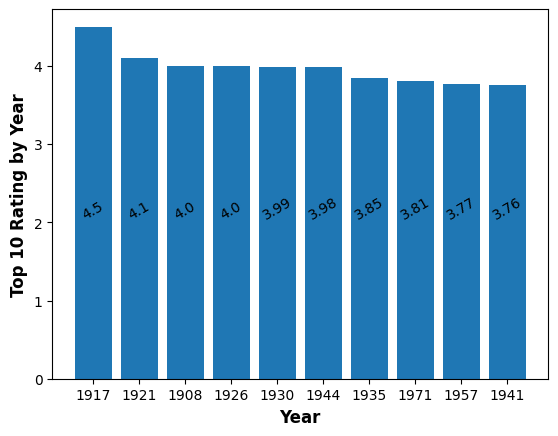

In [36]:
# Respuesta
#Fuentes consultadas: analyticslane.com

# Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
data_movies = pd.read_csv("prog_datasci_7/data/movies.csv")
data_ratings = pd.read_csv("prog_datasci_7/data/ratings.csv")

date = []
for i in data_movies['title']:
    date.append(i[-6:])

date_2 = []
for e in date:
    e = e.replace('(', '')
    e = e.replace(')', '')
    e = e.replace(' ', '')
    e = e.replace('–', '')
    date_2.append(e)

data_movies['date'] = date_2

anorm = ([data_movies.date == 'Mirror','Mirror', 'Iron2', 'aRoad', 'Watson', 
          'dBaby', 'TheOA', 'ylon5', 'Cosmos', 'nlight', 'nimals', 'terson',
          'erOne'])
          
for dat in anorm:
    loc_anorm = data_movies.loc[data_movies['date'] == dat]

for dat in anorm:
    data_movies.loc[data_movies['date'] == dat, 'date'] = np.nan

for fecha in data_movies['date']:
    if 1895 > float(fecha) > 2023:
        data_movies.loc[data_movies['date'] == fecha, 'date'] = np.nan

main_genre = []
for genre in data_movies['genres']:
    for letra in genre:
        if letra == '|':
            n = genre.find(letra)
    main_genre.append(genre[:n])
  
data_movies['main_genre'] = main_genre
data_movies.loc[(data_movies.main_genre == 'Documenta')|
                (data_movies.main_genre == 'Docume')|
                (data_movies.main_genre == 'Document')|
                (data_movies.main_genre == 'Documen')|
                (data_movies.main_genre == 'Docum'), 'main_genre'] = 'Documentary'
data_movies.loc[(data_movies.main_genre == 'Anima')|
                (data_movies.main_genre == 'Animat'), 'main_genre'] = 'Animation'
data_movies.loc[(data_movies.main_genre == 'Fantas'), 'main_genre'] = 'Fantasy'
data_movies.loc[(data_movies.main_genre == 'Advent'), 'main_genre'] = 'Adventure'
data_movies.loc[(data_movies.main_genre == 'Film-')|
                (data_movies.main_genre == 'Film-N'), 'main_genre'] = 'Film-Noir'
data_movies.loc[(data_movies.main_genre == 'Thril')|
                (data_movies.main_genre == 'Thrille')|
                (data_movies.main_genre == 'Thrill'), 'main_genre'] = 'Thriller'
data_movies.loc[(data_movies.main_genre == 'Roman')|
                (data_movies.main_genre == 'Romanc'), 'main_genre'] = 'Romance'
data_movies.loc[(data_movies.main_genre == 'Myste')|
                (data_movies.main_genre == 'Myster'), 'main_genre'] = 'Mystery'
data_movies.loc[(data_movies.main_genre == 'Sci-F'), 'main_genre'] = 'Sci-Fi'
data_movies.loc[(data_movies.main_genre == '(no g')|
                (data_movies.main_genre == '(no ge')|
                (data_movies.main_genre == '(no genre')|
                (data_movies.main_genre == '(no genre listed)'), 'main_genre'] = 'no genres listed'
data_movies.loc[(data_movies.main_genre == 'Weste')|
                (data_movies.main_genre == 'Wester'), 'main_genre'] = 'Western'
data_movies.loc[(data_movies.main_genre == 'Child')|
                (data_movies.main_genre == 'Childr'), 'main_genre'] = 'Children'
data_movies.loc[(data_movies.main_genre == 'Comed'), 'main_genre'] = 'Comedy'
data_movies.loc[(data_movies.main_genre == 'Musica')|
                (data_movies.main_genre == 'Music'), 'main_genre'] = 'Musical'
data_movies.loc[(data_movies.main_genre == 'Actio'), 'main_genre'] = 'Action'
data_movies.loc[(data_movies.main_genre == 'Horro'), 'main_genre'] = 'Horror'


gr_movie = data_ratings.groupby('movieId')
media = gr_movie.aggregate({'rating': np.mean})
media = round(media, 2)
media_ra = []

for t in media['rating']:
    media_ra.append(t)

media_indice = list(set(data_ratings['movieId']))
lista_not = []

for dm in data_movies['movieId']:
    if dm not in media_indice:
        not_in = data_movies.loc[data_movies.movieId == dm]
        lista_not.append(not_in)

data_movies = data_movies.drop([816, 2211, 2499, 2587, 3118, 4037, 4506, 4598, 
                                4704, 5020, 5293, 5421, 5452, 5749, 5824, 5837, 
                                5957, 7565], axis = 0)
    
data_movies['rating_mean'] = media_ra

contar = 0
for i in lista_not:
    contar +=  1

data_movies = data_movies.append(lista_not)
data_movies.rating_mean[-contar:] = 0  

val_num = data_ratings['movieId'].value_counts()
val_num = val_num.sort_index()
val_num = list(val_num)
val_num.extend([0]*18)
data_movies['times_rated'] = val_num

#Calculamos puntuación media por año y lo ordenamos de mayor a menor
#print(data_movies)

by_date = data_movies.groupby('date')
media_date = by_date.aggregate({'rating_mean': np.mean})
media_date = round(media_date, 2)
media_date = media_date.sort_values(by = ['rating_mean'], ascending = False)

#Importamos librería matplotlib y mostramos el top10 de años (con mayor 
#puntuación) usando un barplot.

import matplotlib.pyplot as plt
top_10 = media_date.head(n = 10)
print('\nLos valores Top 10 son: \n', top_10)

def valor_bar(x,y):
    for i in range(0, len(x)):
        plt.annotate(y[i],(i,y[1]/2),rotation=30, ha="center")

total = top_10.sum(axis = 1)
plt.bar(total.index, total)
valor_bar(total.index, total)
plt.xlabel('Year', fontsize = 12, fontweight = 'bold')
plt.ylabel('Top 10 Rating by Year', fontsize = 12, fontweight = 'bold')

plt.show()

b) Calcula también la puntuación media por género. ¿Qué género tiene la mayor puntuación media, y cuál la peor? 

$\color{green}{\text{NM}}$ **(0.25 puntos)** 

In [71]:
# Respuesta

# Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
data_movies = pd.read_csv("prog_datasci_7/data/movies.csv")
data_ratings = pd.read_csv("prog_datasci_7/data/ratings.csv")

date = []
for i in data_movies['title']:
    date.append(i[-6:])

date_2 = []
for e in date:
    e = e.replace('(', '')
    e = e.replace(')', '')
    e = e.replace(' ', '')
    e = e.replace('–', '')
    date_2.append(e)

data_movies['date'] = date_2

anorm = ([data_movies.date == 'Mirror','Mirror', 'Iron2', 'aRoad', 'Watson', 
          'dBaby', 'TheOA', 'ylon5', 'Cosmos', 'nlight', 'nimals', 'terson',
          'erOne'])
          
for dat in anorm:
    loc_anorm = data_movies.loc[data_movies['date'] == dat]

for dat in anorm:
    data_movies.loc[data_movies['date'] == dat, 'date'] = np.nan

for fecha in data_movies['date']:
    if 1895 > float(fecha) > 2023:
        data_movies.loc[data_movies['date'] == fecha, 'date'] = np.nan

main_genre = []
for genre in data_movies['genres']:
    for letra in genre:
        if letra == '|':
            n = genre.find(letra)
    main_genre.append(genre[:(n)])
  
data_movies['main_genre'] = main_genre
data_movies.loc[(data_movies.main_genre == 'Documenta')|
                (data_movies.main_genre == 'Docume')|
                (data_movies.main_genre == 'Document')|
                (data_movies.main_genre == 'Documen')|
                (data_movies.main_genre == 'Docum'), 'main_genre'] = 'Documentary'
data_movies.loc[(data_movies.main_genre == 'Anima')|
                (data_movies.main_genre == 'Animat'), 'main_genre'] = 'Animation'
data_movies.loc[(data_movies.main_genre == 'Fantas'), 'main_genre'] = 'Fantasy'
data_movies.loc[(data_movies.main_genre == 'Advent'), 'main_genre'] = 'Adventure'
data_movies.loc[(data_movies.main_genre == 'Film-')|
                (data_movies.main_genre == 'Film-N'), 'main_genre'] = 'Film-Noir'
data_movies.loc[(data_movies.main_genre == 'Thril')|
                (data_movies.main_genre == 'Thrille')|
                (data_movies.main_genre == 'Thrill'), 'main_genre'] = 'Thriller'
data_movies.loc[(data_movies.main_genre == 'Roman')|
                (data_movies.main_genre == 'Romanc'), 'main_genre'] = 'Romance'
data_movies.loc[(data_movies.main_genre == 'Myste')|
                (data_movies.main_genre == 'Myster'), 'main_genre'] = 'Mystery'
data_movies.loc[(data_movies.main_genre == 'Sci-F'), 'main_genre'] = 'Sci-Fi'
data_movies.loc[(data_movies.main_genre == '(no g')|
                (data_movies.main_genre == '(no ge')|
                (data_movies.main_genre == '(no genre')|
                (data_movies.main_genre == '(no genre listed)'), 'main_genre'] = 'no genres listed'
data_movies.loc[(data_movies.main_genre == 'Weste')|
                (data_movies.main_genre == 'Wester'), 'main_genre'] = 'Western'
data_movies.loc[(data_movies.main_genre == 'Child')|
                (data_movies.main_genre == 'Childr'), 'main_genre'] = 'Children'
data_movies.loc[(data_movies.main_genre == 'Comed'), 'main_genre'] = 'Comedy'
data_movies.loc[(data_movies.main_genre == 'Musica')|
                (data_movies.main_genre == 'Music'), 'main_genre'] = 'Musical'
data_movies.loc[(data_movies.main_genre == 'Actio'), 'main_genre'] = 'Action'
data_movies.loc[(data_movies.main_genre == 'Horro'), 'main_genre'] = 'Horror'


gr_movie = data_ratings.groupby('movieId')
media = gr_movie.aggregate({'rating': np.mean})
media = round(media, 2)
media_ra = []

for t in media['rating']:
    media_ra.append(t)

media_indice = list(set(data_ratings['movieId']))
lista_not = []

for dm in data_movies['movieId']:
    if dm not in media_indice:
        not_in = data_movies.loc[data_movies.movieId == dm]
        lista_not.append(not_in)

data_movies = data_movies.drop([816, 2211, 2499, 2587, 3118, 4037, 4506, 4598, 
                                4704, 5020, 5293, 5421, 5452, 5749, 5824, 5837, 
                                5957, 7565], axis = 0)
    
data_movies['rating_mean'] = media_ra

contar = 0
for i in lista_not:
    contar +=  1

data_movies = data_movies.append(lista_not)
data_movies.rating_mean[-contar:] = 0  

val_num = data_ratings['movieId'].value_counts()
val_num = val_num.sort_index()
val_num = list(val_num)
val_num.extend([0]*18)
data_movies['times_rated'] = val_num

by_date = data_movies.groupby('date')
media_date = by_date.aggregate({'rating_mean': np.mean})
media_date = round(media_date, 2)
media_date = media_date.sort_values(by = ['rating_mean'], ascending = False)

#Obviamos Código de gráfico barplot
'''import matplotlib.pyplot as plt
top_10 = media_date.head(n = 10)

def valor_bar(x,y):
    for i in range(0, len(x)):
        plt.annotate(y[i],(i,y[1]/2),rotation=30, ha="center")

total = top_10.sum(axis = 1)
plt.bar(total.index, total)
valor_bar(total.index, total)
plt.xlabel('Year', fontsize = 12, fontweight = 'bold')
plt.ylabel('Top 10 Rating by Year', fontsize = 12, fontweight = 'bold')'''

#Calculamos puntuación media por género y mostramos los géneros con mayor 
#y menor puntuación respectivamente

by_genre = data_movies.groupby('main_genre')
media_genre = by_genre.aggregate({'rating_mean': np.mean})
media_genre = round(media_genre, 2)
media_genre = media_genre.sort_values(by = ['rating_mean'], ascending = False)
max_mg = media_genre.head(n = 1)
min_mg = media_genre.tail(n = 1)

print('\nEl género con mejor puntuación media es: \n', max_mg)
print('\nEl género con peor puntuación media es: \n', min_mg)
print('\nLA puntuación de cada género es: \n', media_genre)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks

El género con mejor puntuación media es: 
             rating_mean
main_genre             
Film-Noir          3.86

El género con peor puntuación media es: 
             rating_mean
main_genre             
Horror             2.79

LA puntuación de cada género es: 
                   rating_mean
main_genre                   
Film-Noir                3.86
Documentary              3.78
Animation                3.56
War                      3.52
Western                  3.47
Drama                    3.45
Crime                    3.39
no genres listed         3.37
Adventure                3.28
Musical                  3.28
Romance                  3.21
Comedy                   3.19
Fantasy                  3.18
Mystery                  3.15
Action                   3.09
Sci-Fi          

<ipython-input-71-9a3d48ba8bef>:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_movies = data_movies.append(lista_not)
<ipython-input-71-9a3d48ba8bef>:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_movies.rating_mean[-contar:] = 0


c) ¿Qué película tiene más valoraciones? Muestra el título de la película y el número de valoraciones. 

$\color{green}{\text{NM}}$ **(0.25 puntos)** 

In [84]:
# Respuesta

# Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
data_movies = pd.read_csv("prog_datasci_7/data/movies.csv")
data_ratings = pd.read_csv("prog_datasci_7/data/ratings.csv")

date = []
for i in data_movies['title']:
    date.append(i[-6:])

date_2 = []
for e in date:
    e = e.replace('(', '')
    e = e.replace(')', '')
    e = e.replace(' ', '')
    e = e.replace('–', '')
    date_2.append(e)

data_movies['date'] = date_2

anorm = ([data_movies.date == 'Mirror','Mirror', 'Iron2', 'aRoad', 'Watson', 
          'dBaby', 'TheOA', 'ylon5', 'Cosmos', 'nlight', 'nimals', 'terson',
          'erOne'])
          
for dat in anorm:
    loc_anorm = data_movies.loc[data_movies['date'] == dat]

for dat in anorm:
    data_movies.loc[data_movies['date'] == dat, 'date'] = np.nan

for fecha in data_movies['date']:
    if 1895 > float(fecha) > 2023:
        data_movies.loc[data_movies['date'] == fecha, 'date'] = np.nan

main_genre = []
for genre in data_movies['genres']:
    for letra in genre:
        if letra == '|':
            n = genre.find(letra)
    main_genre.append(genre[:(n)])
  
data_movies['main_genre'] = main_genre
data_movies.loc[(data_movies.main_genre == 'Documenta')|
                (data_movies.main_genre == 'Docume')|
                (data_movies.main_genre == 'Document')|
                (data_movies.main_genre == 'Documen')|
                (data_movies.main_genre == 'Docum'), 'main_genre'] = 'Documentary'
data_movies.loc[(data_movies.main_genre == 'Anima')|
                (data_movies.main_genre == 'Animat'), 'main_genre'] = 'Animation'
data_movies.loc[(data_movies.main_genre == 'Fantas'), 'main_genre'] = 'Fantasy'
data_movies.loc[(data_movies.main_genre == 'Advent'), 'main_genre'] = 'Adventure'
data_movies.loc[(data_movies.main_genre == 'Film-')|
                (data_movies.main_genre == 'Film-N'), 'main_genre'] = 'Film-Noir'
data_movies.loc[(data_movies.main_genre == 'Thril')|
                (data_movies.main_genre == 'Thrille')|
                (data_movies.main_genre == 'Thrill'), 'main_genre'] = 'Thriller'
data_movies.loc[(data_movies.main_genre == 'Roman')|
                (data_movies.main_genre == 'Romanc'), 'main_genre'] = 'Romance'
data_movies.loc[(data_movies.main_genre == 'Myste')|
                (data_movies.main_genre == 'Myster'), 'main_genre'] = 'Mystery'
data_movies.loc[(data_movies.main_genre == 'Sci-F'), 'main_genre'] = 'Sci-Fi'
data_movies.loc[(data_movies.main_genre == '(no g')|
                (data_movies.main_genre == '(no ge')|
                (data_movies.main_genre == '(no genre')|
                (data_movies.main_genre == '(no genre listed)'), 'main_genre'] = 'no genres listed'
data_movies.loc[(data_movies.main_genre == 'Weste')|
                (data_movies.main_genre == 'Wester'), 'main_genre'] = 'Western'
data_movies.loc[(data_movies.main_genre == 'Child')|
                (data_movies.main_genre == 'Childr'), 'main_genre'] = 'Children'
data_movies.loc[(data_movies.main_genre == 'Comed'), 'main_genre'] = 'Comedy'
data_movies.loc[(data_movies.main_genre == 'Musica')|
                (data_movies.main_genre == 'Music'), 'main_genre'] = 'Musical'
data_movies.loc[(data_movies.main_genre == 'Actio'), 'main_genre'] = 'Action'
data_movies.loc[(data_movies.main_genre == 'Horro'), 'main_genre'] = 'Horror'


gr_movie = data_ratings.groupby('movieId')
media = gr_movie.aggregate({'rating': np.mean})
media = round(media, 2)
media_ra = []

for t in media['rating']:
    media_ra.append(t)

media_indice = list(set(data_ratings['movieId']))
lista_not = []

for dm in data_movies['movieId']:
    if dm not in media_indice:
        not_in = data_movies.loc[data_movies.movieId == dm]
        lista_not.append(not_in)

data_movies = data_movies.drop([816, 2211, 2499, 2587, 3118, 4037, 4506, 4598, 
                                4704, 5020, 5293, 5421, 5452, 5749, 5824, 5837, 
                                5957, 7565], axis = 0)
    
data_movies['rating_mean'] = media_ra

contar = 0
for i in lista_not:
    contar +=  1

data_movies = data_movies.append(lista_not)
data_movies.rating_mean[-contar:] = 0  

val_num = data_ratings['movieId'].value_counts()
val_num = val_num.sort_index()
val_num = list(val_num)
val_num.extend([0]*18)
data_movies['times_rated'] = val_num

by_date = data_movies.groupby('date')
media_date = by_date.aggregate({'rating_mean': np.mean})
media_date = round(media_date, 2)
media_date = media_date.sort_values(by = ['rating_mean'], ascending = False)

#Obviamos Código de gráfico barplot
'''import matplotlib.pyplot as plt
top_10 = media_date.head(n = 10)

def valor_bar(x,y):
    for i in range(0, len(x)):
        plt.annotate(y[i],(i,y[1]/2),rotation=30, ha="center")

total = top_10.sum(axis = 1)
plt.bar(total.index, total)
valor_bar(total.index, total)
plt.xlabel('Year', fontsize = 12, fontweight = 'bold')
plt.ylabel('Top 10 Rating by Year', fontsize = 12, fontweight = 'bold')'''

by_genre = data_movies.groupby('main_genre')
media_genre = by_genre.aggregate({'rating_mean': np.mean})
media_genre = round(media_genre, 2)
media_genre = media_genre.sort_values(by = ['rating_mean'], ascending = False)

max_mg = media_genre.head(n = 1)
min_mg = media_genre.tail(n = 1)

#Detectamos la película que tiene más valoraciones, mostramos su título y el 
#número de valoraciones

by_times_rated = data_movies.sort_values(by = ['times_rated'], ascending = False)
max_by_times = by_times_rated.head(n = 1)

print('\nLa película que tiene más valoraciones es: \n', 
      max_by_times[['title','times_rated']], '\n')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks

La película que tiene más valoraciones es: 
                    title  times_rated
314  Forrest Gump (1994)          329


<ipython-input-84-d140669bc687>:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_movies = data_movies.append(lista_not)
<ipython-input-84-d140669bc687>:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_movies.rating_mean[-contar:] = 0


### Ejercicio 3

En el dataset ampliado de movies tenemos información sobre el año, la categoría, la puntuación y el número de valoraciones por película. Con toda esta información, queremos utilizar un algoritmo de clustering para agrupar las películas en diferentes grupos según sus características. Para lograrlo, vamos a utilizar el algoritmo **KMeans**. 

(**2 puntos**)


a) Primero de todo, vamos a quedarnos solo con las características que nos interesan, en este caso, `movieId`, `year`, `principal_genre`, `rating` y `userId`. Muestra el nuevo dataframe por pantalla. $\color{green}{\text{NM}}$ (**0.25 puntos**)

In [90]:
# Respuesta

# Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
data_movies = pd.read_csv("prog_datasci_7/data/movies.csv")
data_ratings = pd.read_csv("prog_datasci_7/data/ratings.csv")

date = []
for i in data_movies['title']:
    date.append(i[-6:])

date_2 = []
for e in date:
    e = e.replace('(', '')
    e = e.replace(')', '')
    e = e.replace(' ', '')
    e = e.replace('–', '')
    date_2.append(e)

data_movies['date'] = date_2

anorm = ([data_movies.date == 'Mirror','Mirror', 'Iron2', 'aRoad', 'Watson', 
          'dBaby', 'TheOA', 'ylon5', 'Cosmos', 'nlight', 'nimals', 'terson',
          'erOne'])
          
for dat in anorm:
    loc_anorm = data_movies.loc[data_movies['date'] == dat]

for dat in anorm:
    data_movies.loc[data_movies['date'] == dat, 'date'] = np.nan

for fecha in data_movies['date']:
    if 1895 > float(fecha) > 2023:
        data_movies.loc[data_movies['date'] == fecha, 'date'] = np.nan

main_genre = []
for genre in data_movies['genres']:
    for letra in genre:
        if letra == '|':
            n = genre.find(letra)
    main_genre.append(genre[:(n)])
  
data_movies['main_genre'] = main_genre
data_movies.loc[(data_movies.main_genre == 'Documenta')|
                (data_movies.main_genre == 'Docume')|
                (data_movies.main_genre == 'Document')|
                (data_movies.main_genre == 'Documen')|
                (data_movies.main_genre == 'Docum'), 'main_genre'] = 'Documentary'
data_movies.loc[(data_movies.main_genre == 'Anima')|
                (data_movies.main_genre == 'Animat'), 'main_genre'] = 'Animation'
data_movies.loc[(data_movies.main_genre == 'Fantas'), 'main_genre'] = 'Fantasy'
data_movies.loc[(data_movies.main_genre == 'Advent'), 'main_genre'] = 'Adventure'
data_movies.loc[(data_movies.main_genre == 'Film-')|
                (data_movies.main_genre == 'Film-N'), 'main_genre'] = 'Film-Noir'
data_movies.loc[(data_movies.main_genre == 'Thril')|
                (data_movies.main_genre == 'Thrille')|
                (data_movies.main_genre == 'Thrill'), 'main_genre'] = 'Thriller'
data_movies.loc[(data_movies.main_genre == 'Roman')|
                (data_movies.main_genre == 'Romanc'), 'main_genre'] = 'Romance'
data_movies.loc[(data_movies.main_genre == 'Myste')|
                (data_movies.main_genre == 'Myster'), 'main_genre'] = 'Mystery'
data_movies.loc[(data_movies.main_genre == 'Sci-F'), 'main_genre'] = 'Sci-Fi'
data_movies.loc[(data_movies.main_genre == '(no g')|
                (data_movies.main_genre == '(no ge')|
                (data_movies.main_genre == '(no genre')|
                (data_movies.main_genre == '(no genre listed)'), 'main_genre'] = 'no genres listed'
data_movies.loc[(data_movies.main_genre == 'Weste')|
                (data_movies.main_genre == 'Wester'), 'main_genre'] = 'Western'
data_movies.loc[(data_movies.main_genre == 'Child')|
                (data_movies.main_genre == 'Childr'), 'main_genre'] = 'Children'
data_movies.loc[(data_movies.main_genre == 'Comed'), 'main_genre'] = 'Comedy'
data_movies.loc[(data_movies.main_genre == 'Musica')|
                (data_movies.main_genre == 'Music'), 'main_genre'] = 'Musical'
data_movies.loc[(data_movies.main_genre == 'Actio'), 'main_genre'] = 'Action'
data_movies.loc[(data_movies.main_genre == 'Horro'), 'main_genre'] = 'Horror'


gr_movie = data_ratings.groupby('movieId')
media = gr_movie.aggregate({'rating': np.mean})
media = round(media, 2)
media_ra = []

for t in media['rating']:
    media_ra.append(t)

media_indice = list(set(data_ratings['movieId']))
lista_not = []

for dm in data_movies['movieId']:
    if dm not in media_indice:
        not_in = data_movies.loc[data_movies.movieId == dm]
        lista_not.append(not_in)

data_movies = data_movies.drop([816, 2211, 2499, 2587, 3118, 4037, 4506, 4598, 
                                4704, 5020, 5293, 5421, 5452, 5749, 5824, 5837, 
                                5957, 7565], axis = 0)
    
data_movies['rating_mean'] = media_ra

contar = 0
for i in lista_not:
    contar +=  1

data_movies = data_movies.append(lista_not)
data_movies.rating_mean[-contar:] = 0  

val_num = data_ratings['movieId'].value_counts()
val_num = val_num.sort_index()
val_num = list(val_num)
val_num.extend([0]*18)
data_movies['times_rated'] = val_num

by_date = data_movies.groupby('date')
media_date = by_date.aggregate({'rating_mean': np.mean})
media_date = round(media_date, 2)
media_date = media_date.sort_values(by = ['rating_mean'], ascending = False)

#Obviamos Código de gráfico barplot
'''import matplotlib.pyplot as plt
top_10 = media_date.head(n = 10)

def valor_bar(x,y):
    for i in range(0, len(x)):
        plt.annotate(y[i],(i,y[1]/2),rotation=30, ha="center")

total = top_10.sum(axis = 1)
plt.bar(total.index, total)
valor_bar(total.index, total)
plt.xlabel('Year', fontsize = 12, fontweight = 'bold')
plt.ylabel('Top 10 Rating by Year', fontsize = 12, fontweight = 'bold')'''

by_genre = data_movies.groupby('main_genre')
media_genre = by_genre.aggregate({'rating_mean': np.mean})
media_genre = round(media_genre, 2)
media_genre = media_genre.sort_values(by = ['rating_mean'], ascending = False)

max_mg = media_genre.head(n = 1)
min_mg = media_genre.tail(n = 1)

by_times_rated = data_movies.sort_values(by = ['times_rated'], ascending = False)
max_by_times = by_times_rated.head(n = 1)

#Creamos nuevo DataFrame con los datos que nos solicitan:

#movieId == 'movieId'
#year == 'date'
#principal_genre == 'main_genre' 
#rating == 'rating_mean'
#userId == 'times_rated'

#Lo guardamos en la variable data_movies_2
data_movies_2 = data_movies[['movieId', 'date', 'main_genre',
                                     'rating_mean', 'times_rated']]
print(data_movies_2)

#Guardamos este nuevo DataFrame en un archivo.csv para poder recurrir a él
#siempre que queramos.
data_movies_2.to_csv('data_movies_2_BVP')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks
      movieId  date main_genre  rating_mean  times_rated
0           1  1995  Adventure         3.92          215
1           2  1995  Adventure         3.43          110
2           3  1995     Comedy         3.26           52
3           4  1995     Comedy         2.36            7
4           5  1995     Comedy         3.07           49
...       ...   ...        ...          ...          ...
5749    30892  2004  Animation         0.00            0
5824    32160  1934     Comedy         0.00            0
5837    32371  1948      Crime         0.00            0
5957    34482  1951      Drama         0.00            0
7565    85565  2011     Comedy         0.00            0

[9742 rows x 5 columns]


<ipython-input-90-1efd795ba41e>:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_movies = data_movies.append(lista_not)
<ipython-input-90-1efd795ba41e>:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_movies.rating_mean[-contar:] = 0


b) Para usar el algoritmo de KMeans, no podemos tener NaNs. Comprueba si hay NaNs en el dataset. ¿Qué estratégias puedes llevar a cabo para solucionar este problema? Da 2 posibilidades, razona cuál escogerías en este caso y aplícala. 
$\color{green}{\text{NM}}$ **(0.25 puntos)**

In [34]:

# Respuesta
#Fuentes consultadas: exponentis.es

#Importamos el nuevo archivo csv con el nuevo DataFrame
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
data_movies_2 = pd.read_csv("prog_datasci_7/data/data_movies_2_BVP")

def any_is_null(x):
    return sum(pd.isnull(x))

print(data_movies_2.apply(any_is_null))
print()
#Hemos detectado que tenemos 12 valores NaNs en la columna 'date'
#Ahora vamos a analizar las filas completas de estos datos para
#poder valorar con mayor exactitud como proceder con ellos:

fila_nan = data_movies_2[data_movies_2.isnull().any(1)]
print(fila_nan)
print()
#Analizando los datos, observamos que podemos llevar a cabo dos opciones:

#Opción 1 >> Calcular la media de todos los datos de 'date' y asignarselo a  
             # cada elemento Nan.

#Opción 2 >> Eliminar las filas en las que se encuentran los valores Nan.

#En nuestro caso vamos a optar por llevar a cabo la opción 2. Vamos a tomar 
#esta decisión porque podemos observar que la malloría de los elementos 
#afectados no tienen el 'main_genre' definido y el 'times_rated' es muy bajo en
#todos ellos, por lo que la calidad de información que estos datos nos aportan
# es baja. Por ende, la eliminación de los mismos no afectará en gran medida
# al análisis que podamos realizar sobre el conjunto de datos al completo.

data_movies_2 = data_movies_2.dropna(how='any')

#Comprobamos que ahora no tenemos elementos Nan tras haberlos eliminado.
print(data_movies_2.apply(any_is_null))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks
Unnamed: 0      0
movieId         0
date           12
main_genre      0
rating_mean     0
times_rated     0
dtype: int64

      Unnamed: 0  movieId  date        main_genre  rating_mean  times_rated
6042        6059    40697   NaN            Sci-Fi         2.25            2
9013        9031   140956   NaN            Action         3.50            4
9073        9091   143410   NaN  no genres listed         2.00            1
9120        9138   147250   NaN  no genres listed         5.00            1
9161        9179   149334   NaN             Drama         3.00            1
9241        9259   156605   NaN  no genres listed         4.50            1
9349        9367   162414   NaN             Drama         5.00            1
9430        9448   167570   NaN  no genres listed         4.00 

<ipython-input-34-cc33dc7ba5b5>:24: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  fila_nan = data_movies_2[data_movies_2.isnull().any(1)]


c) Los elementos de la columna del género principal, al ser un string, no se pueden usar directamente en el KMeans, sino que se tienen que transformar a valor numérico. ¿Qué tipo de transformación es más adecuada para esto? Aplícala. $\color{green}{\text{NM}}$ **(0.25 puntos)**

In [41]:
# Respuesta

# Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
data_movies_2 = pd.read_csv("prog_datasci_7/data/data_movies_2_BVP")

def any_is_null(x):
    return sum(pd.isnull(x))

fila_nan = data_movies_2[data_movies_2.isnull().any(1)]
data_movies_2 = data_movies_2.dropna(how='any')

#Comprobamos el número de elementos posibles de 'mean_genre'
print(set(data_movies_2['main_genre']))

#Transformamos estos elementos en un conjunto de atributos binarios.
data_movies_2 = pd.get_dummies(data_movies_2, columns=['main_genre'], 
                               dummy_na = False)
#Comprobamos los resultados
print(data_movies_2)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks
{'Romance', 'Thriller', 'Sci-Fi', 'no genres listed', 'Children', 'Action', 'Mystery', 'Film-Noir', 'Drama', 'Horror', 'War', 'Comedy', 'Western', 'Crime', 'Musical', 'Adventure', 'Animation', 'Fantasy', 'Documentary'}
      Unnamed: 0  movieId    date  rating_mean  times_rated  \
0              0        1  1995.0         3.92          215   
1              1        2  1995.0         3.43          110   
2              2        3  1995.0         3.26           52   
3              3        4  1995.0         2.36            7   
4              4        5  1995.0         3.07           49   
...          ...      ...     ...          ...          ...   
9737        5749    30892  2004.0         0.00            0   
9738        5824    32160  1934.0         0.00            0   
9739   

<ipython-input-41-5dcee11353a9>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  fila_nan = data_movies_2[data_movies_2.isnull().any(1)]


d) Antes de aplicar el KMeans, normaliza los datos numéricos utilizando la función MinMaxScaler. ¿Por que razón es importante hacer esta transformación? $\color{green}{\text{NM}}$ **(0.25 puntos)**

In [13]:
# Respuesta

#Fuentes consultadas: 'Análisis de componentes principales (PCA) y descomposición
# en valores singulares (SVD)' Temario UOC - Álgebra Lineal

# Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
data_movies_2 = pd.read_csv("prog_datasci_7/data/data_movies_2_BVP")

def any_is_null(x):
    return sum(pd.isnull(x))

fila_nan = data_movies_2[data_movies_2.isnull().any(1)]
data_movies_2 = data_movies_2.dropna(how='any')

data_movies_2 = pd.get_dummies(data_movies_2, columns=['main_genre'], 
                               dummy_na = False)

#Dado que las variables pueden tener diferentes escalas y magnitudes, hay que
#aplicar al conjunto de datos un preproceso para escalar las variables, de forma
#que todas tengan de media 0 y de desviación típica 1. La desviación típica
#se define como la raíz cuadrada de la varianza. Esto es muy importante, ya que
#debemos de estar seguros de usar un conjunto de datos cuya escala y magnitud
#sea unificada.

#Importamos el escalador
from sklearn.preprocessing import MinMaxScaler
#Normalizamos los datos
scaler = MinMaxScaler()
data2_scaled = scaler.fit_transform(data_movies_2)
print(data2_scaled)
#Comprobamos que efectivamente todos los datos se encuentran escalados en un 
# rango entre 0 y 1..
data2_scaled = pd.DataFrame(data2_scaled)
print(data2_scaled.describe())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks
[[0.00000000e+00 0.00000000e+00 8.01724138e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.02658865e-04 5.16507582e-06 8.01724138e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.05317729e-04 1.03301516e-05 8.01724138e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.99219793e-01 1.67193504e-01 3.96551724e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.11538856e-01 1.78096979e-01 4.22413793e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.76614311e-01 4.41944548e-01 9.39655172e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
                0            1            2            3            4   \
count  9730.000000  9730.000000  9730.000000  9730.000000  9730.000000   
mean      0.499469     0.217276     0.798404 

<ipython-input-13-32ae110890c7>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  fila_nan = data_movies_2[data_movies_2.isnull().any(1)]


e) Uno de los problemas de los métodos no supervisados es identificar el número óptimo de clusters. Para poder estimar esta número óptimo, se utiliza frecuentemente el método de Elbow. Busca información sobre este método y utilízalo. ¿Cuál es el número óptimo de clusters? Considera un rango entre 1 y 20 clusters. $\color{red}{\text{EI}}$ **(0.5 puntos)**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks


<ipython-input-41-d6de51eac078>:17: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  fila_nan = data_movies_2[data_movies_2.isnull().any(1)]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The def

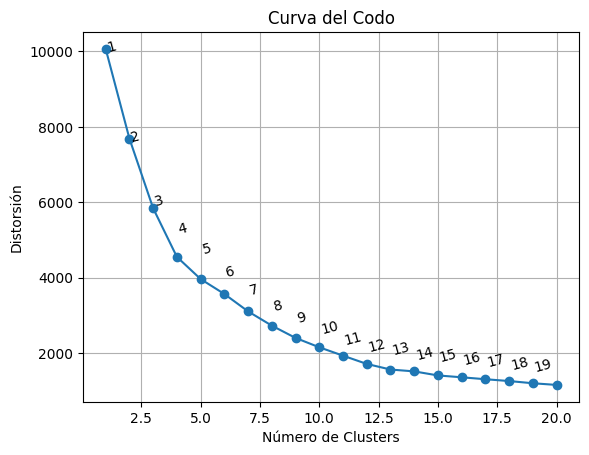

In [41]:
# Respuesta
#Fuentes consultadas: platzi.com + analyticslane.com

# Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
data_movies_2 = pd.read_csv("prog_datasci_7/data/data_movies_2_BVP")

def any_is_null(x):
    return sum(pd.isnull(x))

fila_nan = data_movies_2[data_movies_2.isnull().any(1)]
data_movies_2 = data_movies_2.dropna(how='any')

data_movies_2 = pd.get_dummies(data_movies_2, columns=['main_genre'], 
                               dummy_na = False)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data2_scaled = scaler.fit_transform(data_movies_2)
data2_scaled = pd.DataFrame(data2_scaled)

#Importamos KMeans y matplotlib
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#El método Elbow o "codo"  nos ayuda a elegir el número optimo de clústers. 
#Partimos del cálculo de la distorsión promedio de cada clúster, 
#esto es la distancia de cada elemento con su centroide correspondiente.

#Creamos función elbow() para calcular la distorsión promedio de cada clúster e
#imprimir los resultados para encontrar el 'codo' en la gráfica que nos indique
#el número adecuado de clusters a utilizar.

def elbow(data, max_clusters):
    distorsion = []

    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(data)
        distorsion.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), distorsion, '-o')

    def valor(max_clusters,y):
        for e in range(0, max_clusters):
            plt.annotate(e,(e,y[e]*1.3),rotation=15)

    plt.grid()
    plt.xlabel('Número de Clusters')
    plt.ylabel('Distorsión')
    plt.title('Curva del Codo')
    valor(max_clusters, distorsion)
    plt.show()

elbow(data2_scaled, 20)

#Usando el método elbow() podemos observar en el gráfico que el codo se forma
#en el número 4, por lo que deducimos que el número óptimo de clúster en un 
# rango de 1-20 es de 4.

f) Aplica el método KMeans especificando el número óptimo de clusters obtenido en el apartado anterior. Cuantas películas hay en cada cluster? $\color{green}{\text{NM}}$ **(0.5 puntos)**

In [2]:
# Respuesta

# Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
data_movies_2 = pd.read_csv("prog_datasci_7/data/data_movies_2_BVP")

def any_is_null(x):
    return sum(pd.isnull(x))

fila_nan = data_movies_2[data_movies_2.isnull().any(1)]
data_movies_2 = data_movies_2.dropna(how='any')

data_movies_2 = pd.get_dummies(data_movies_2, columns=['main_genre'], 
                               dummy_na = False)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data2_scaled = scaler.fit_transform(data_movies_2)
data2_scaled = pd.DataFrame(data2_scaled)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow(data, max_clusters):
    distorsion = []

    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(data)
        distorsion.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), distorsion, '-o')

    def valor(max_clusters,y):
        for e in range(0, max_clusters):
            plt.annotate(e,(e,y[e]*1.3),rotation=15)

    plt.grid()
    plt.xlabel('Número de Clusters')
    plt.ylabel('Distorsión')
    plt.title('Curva del Codo')
    valor(max_clusters, distorsion)
    plt.show()

#Importamos cluster desde sklearn
from sklearn import cluster

#Aplicamos el método KMeans con 4 clusters
k_means = cluster.KMeans(n_clusters = 4).fit(data2_scaled)

#Obtenemos las etiquetas de cluster asignadas a cada fila
labels = k_means.labels_
print(set(labels))

#Contamos número de películas en cada cluster
num_labels = pd.Series(labels).value_counts()
print(num_labels)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks


<ipython-input-2-df24c1b27f02>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  fila_nan = data_movies_2[data_movies_2.isnull().any(1)]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{0, 1, 2, 3}
3    2900
0    2779
1    2224
2    1827
dtype: int64


### Ejercicio opcional

Una plataforma de contenido digital nos ha contactado para que le ayudemos a hacer un algoritmo que permita recomendar películas, basándonos en las valoraciones de los usuarios de esta plataforma. Para demostrar que estamos preparados para tal desafío, vamos a usar los datos de películas y valoraciones del ejercicio anterior para construir un sistema de recomendación. 

a) Utilizando el dataset de `ratings.csv` original, crea una `pivot table` que tenga **movieID** como filas, **userID** como columnas, y las valoraciones (**rating**) como el valor. Esta nueva tabla nos dará información de la valoración que ha puesto cada usuario a cada película.

In [ ]:
# Respuesta

b) Los usuarios no puntúan todas las películas, por eso tenemos bastantes NaNs. Sustituye estos NaNs por 0. 

In [ ]:
# Respuesta

c) Como podéis ver, la matriz resultante tiene muchos 0, ya que hay muchas películas que no se puntúan. Para que esto no nos afecte en el análisis, vamos a quedarnos solo con aquellos usuarios que han puntuado más de 10 veces y aquellas películas valoradas más de 50 veces. 

In [ ]:
# Respuesta

d) Para construír el algoritmo de recomendación, necesitamos comprimir el dataframe en una matriz esparza (*sparce matrix*). Para hacerlo, vamos a usar la función [csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html). 

In [ ]:
# Respuesta

e) A continuación, haz un reseteo de los índices (con **reset_index**) del dataframe anterior, ya que vamos a necesitarlo en los siguientes apartados.

In [ ]:
# Respuesta

f) Finalmente, vamos a entrenar el algoritmo no supervisado de [K-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html). Como parámetros, vamos a usar la metrica `cosine` y 20 vecinos (*n_neighbors*). 

In [ ]:
# Respuesta

g) Para comprobar que hemos seguido los pasos correctos, vamos a usar la función `get_movie_recommendation` para sacar 5 películas recomendadas basadas en **Matrix**. Estudia bien la función para entender cuáles son los inputs necesarios y como se relacionan con los pasos que hemos hecho anteriormente.

In [ ]:
def get_movie_recommendation(
    movies_df,
    user_movie_ratings_df,
    movie_name, 
    n_movies_to_reccomend, 
    model
):
    """
    movies_df: DataFrame de películas original (es decir, movie.csv)
    user_movie_ratings_df: DataFrame de la pivot table después del reseteo de los índices
    movie_name: nombre de la película de la cual queremos recomendaciones
    n_movies_to_reccomend: número de recomendaciones (e.g. 10)
    model: modelo NN entrenado con la matriz esparza (csr_matrix)
    """
    # Buscamos películas que contengan el nombre que hemos indicado
    movie_list = movies_df[movies_df['title'].str.contains(movie_name)]
    # Si hay
    if len(movie_list):
        # Nos quedamos con el índice la 1a película de la lista
        movie_idx= movie_list.iloc[0]['movieId']
        # Mostramos por pantalla la película que vamos a usar como referencia
        print(f"Recommendations for {movie_list.iloc[0]['title']}\n")
        # Miramos a que índice del df de la pivot table corresponde este movieId
        movie_idx = user_movie_ratings_df[user_movie_ratings_df['movieId'] == movie_idx].index[0]
        # Calculamos la distancia y los índices aplicando el KNN a esta película
        distances , indices = model.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        # Ordenamos los índices por la distancia para tener los vecinos más similares
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        # Creamos un lista para guardar los resultados
        recommend_frame = []
        # Vamos a guardar la información de cada película recomendada
        for val in rec_movie_indices:
            # Sacamos el movieId de la película recomendada
            movie_idx = user_movie_ratings_df.iloc[val[0]]['movieId']
            # Miramos a que índice corresponde de movies_df
            idx = movies_df[movies_df['movieId'] == movie_idx].index
            # Guardamos el título y la distancia de la película
            recommend_frame.append({'Title':movies_df.iloc[idx]['title'].values[0],'Distance':val[1]})
        # Transformamos la lista a df
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [ ]:
# Respuesta

### Ejercicio 4

A continuación vamos a cambiar a un dataset mucho más grande con más películas de todas las épocas. Su nombre es `movies_long.csv` y lo podréis encontrar en la carpeta `data`. **(1.25 puntos)**

(a) Carga el *dataset* e imprime por pantalla sus dimensiones, así como el nombre de las columnas, su tipo y el número de valores no perdidos que contienen. Imprime también las diez primeras filas para ver qué tipo de datos contiene. Elimina las filas que contengan valores perdidos, o NaN, del dataset, para evitar problemas. $\color{green}{\text{NM}}$ **(0.5 puntos)**

In [13]:
# Respuesta

from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np

#Guardamos en la variable datalong_movies el dataset movies_long.csv
datalong_movies = pd.read_csv("prog_datasci_7/data/movies_long.csv")

#Imprimimos sus dimensiones, el nombre de las columnas, su tipo y el número de 
#valores no perdidos que contienen.
print(datalong_movies.info())

#Imprimimos las 10 primeras filas
print(datalong_movies.head(n = 10))

#Eliminamos las filas que contengan valores perdidos o NaN.

def any_is_null(x):
    return sum(pd.isnull(x))

fila_nan = datalong_movies[datalong_movies.isnull().any(1)]
datalong_movies = datalong_movies.dropna(how='any')

#Volvemos a imprimir la información del dataset una vez modificada, y volvemos
# a imprimir sus 10 primeras filas
print(datalong_movies.info())
print(datalong_movies.head(n = 10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int

<ipython-input-13-c4725e60733f>:26: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  fila_nan = datalong_movies[datalong_movies.isnull().any(1)]


(b) Queremos centrarnos en en valor de las ganancias totales de las películas (dadas por la columna 'gross') y ver si podemos encontrar una manera de predecirlo con los datos de los que disponemos. Primero, visualiza la correlación entre todas las variables y grafícala utilizando la librería `seaborn`. Verás que no todas las variables se han añadido en la gráfica. ¿Por qué es? **(0.5 puntos)**  $\color{green}{\text{NM}}$

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks
             year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000



<ipython-input-23-cb9fdae1a1cf>:18: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  fila_nan = datalong_movies[datalong_movies.isnull().any(1)]
<ipython-input-23-cb9fdae1a1cf>:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = datalong_movies.corr(method='pearson')


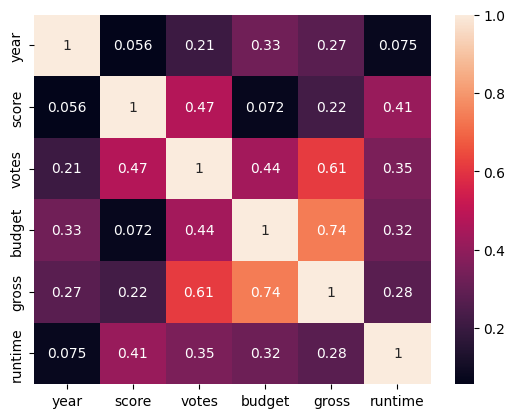

In [23]:
# Respuesta
#Fuentes consultadas: delftstack.com

#Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np

datalong_movies = pd.read_csv("prog_datasci_7/data/movies_long.csv")

def any_is_null(x):
    return sum(pd.isnull(x))

fila_nan = datalong_movies[datalong_movies.isnull().any(1)]
datalong_movies = datalong_movies.dropna(how='any')

#importamos librería seaborn y matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

#Calculamos la correlación entre todas las variables usando el método pearson (
#prueba que mide la relación estadística entre dos variables continuas, puede 
#tomar un rango de valores de +1 a -1)
correlacion = datalong_movies.corr(method='pearson')
print(correlacion)
print()

#Observamos que no todas las variables han sido añadidas a correlación, esto 
#se debe a que sólo se tienen en cuenta aquellas variables que sean numéricas.
#Por lo tanto, en la gráfica sólo saldrán aquellas variables que son 
# numéricas.

#Graficamos los datos de correlacion usando la librearía seaborn
plt.plot()
sns.heatmap(correlacion, annot=True)
plt.show()


(c) Muestra una lista con las variables que más se correlacionan con 'gross', ordenada de mayor correlación a menor correlación.   $\color{green}{\text{NM}}$ **(0.25 puntos)**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks


<ipython-input-27-20dab76d5385>:17: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  fila_nan = datalong_movies[datalong_movies.isnull().any(1)]
<ipython-input-27-20dab76d5385>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = datalong_movies.corr(method='pearson')


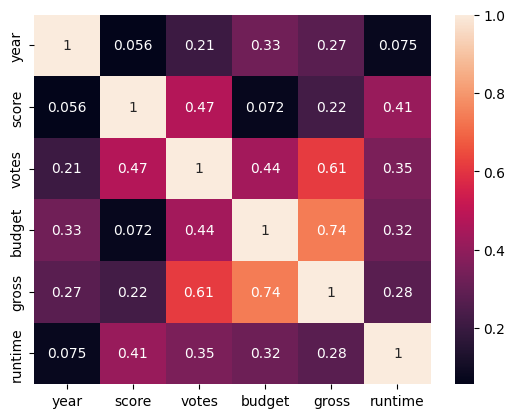

gross      1.000000
budget     0.740247
votes      0.614751
runtime    0.275796
year       0.274321
score      0.222556
Name: gross, dtype: float64


In [27]:
# Respuesta

#Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np

datalong_movies = pd.read_csv("prog_datasci_7/data/movies_long.csv")

def any_is_null(x):
    return sum(pd.isnull(x))

fila_nan = datalong_movies[datalong_movies.isnull().any(1)]
datalong_movies = datalong_movies.dropna(how='any')

#importamos librería seaborn y matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

correlacion = datalong_movies.corr(method='pearson')

plt.plot()
sns.heatmap(correlacion, annot=True)
plt.show()

#Mostramos la lista de las variables que más se correlacionan con 'gross 
#ordenada de mayor a menor
maxcorr_gross = correlacion['gross'].sort_values(ascending = False)
print(maxcorr_gross)

### Ejercicio 5

A continuación vamos a intentar utilizar la técnica de PCA para reducir la dimensionalidad del dataset. Hemos visto en el apartado anterior que muchas variables están muy correlacionadas con 'gross', por lo que es bastante probable que exista información redundante. **Nota:** aunque PCA se puede aplicar sin problemas en este caso, realmente no es extremadamente útil, ya que tenemos un número bastante pequeño de "features". PCA es sobre todo útil cuando tenemos muchas dimensiones (o "features") y queremos reducirlo a un número más adecuado para el análisis rápido. En nuestro caso, utilizamos un dataset más pequeño para que sea más sencillo. **(2 puntos)** 

(a) Antes de ajustar el modelo de PCA, tipifica los datos con `sklearn.preprocessing.StandardScaler`, para lo que primero tendrás que seleccionar **sólo las columnas que contienen valores numéricos**. ¿Qué hace esta función? Calcula el valor medio y la desviación típica de los datos tipificados **antes y después** de aplicar la función para cada de las variables. **(0.5 puntos)**  $\color{green}{\text{NM}}$

In [3]:
# Respuesta

#Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

datalong_movies = pd.read_csv("prog_datasci_7/data/movies_long.csv")

def any_is_null(x):
    return sum(pd.isnull(x))

fila_nan = datalong_movies[datalong_movies.isnull().any(1)]
datalong_movies = datalong_movies.dropna(how='any')

correlacion = datalong_movies.corr(method='pearson')

#Obviamos código del gráfico
'''plt.plot()
sns.heatmap(correlacion, annot=True)
plt.show()'''

maxcorr_gross = correlacion['gross'].sort_values(ascending = False)

#Importamos sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import StandardScaler

#Listamos en var_num aquellas variables que tienen datos numéricos:
var_num = []
for i in correlacion:
    var_num.append(i)
print(var_num)

#Creamos dataframe que contenga solo la información de variables numericas
df_varnum = datalong_movies[['year', 'score', 'votes', 'budget', 'gross', 
                             'runtime']]

#Esta función normaliza los datos para que todos tengan la misma magnitud. Para
#corroborar que se ha llevado a cabo correctamente la media de los datos una
# vez nromalizados (transformados) debe ser práctimante 0 y la desviación 
#típica prácticamente 1.

#Normalizamos los datos con sklearn.preprocessing.StandardScaler
scaler = StandardScaler()
print(scaler.fit(df_varnum))
#Comprobamos la media y la desviación antes de transformar los datos 
print('\nMedia antes de normalizar los datos: \n', scaler.mean_)
print('\nDesviación antes de normalizar los datos: \n', scaler.var_) 
print('\nEl DataFrame es: \n', df_varnum)
# Transformamos los datos y comprobamos que la media y la desviación 
# son prácticamente 0 y 1 respectivamente
df_varnum_scaled = scaler.transform(df_varnum)
print(scaler.fit(df_varnum_scaled))
print('\nMedia después de normalizar los datos: \n', scaler.mean_)
print('\nDesviación después de normalizar los datos: \n', scaler.var_) 
print('\nLa matriz con los datos normalizados es: \n', df_varnum_scaled)





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks
['year', 'score', 'votes', 'budget', 'gross', 'runtime']
StandardScaler()

Media antes de normalizar los datos: 
 [2.00166132e+03 6.39245527e+00 1.15066129e+05 3.60091705e+07
 1.03229653e+08 1.08152739e+02]

Desviación antes de normalizar los datos: 
 [1.11090238e+02 9.26677997e-01 3.39997634e+10 1.72802660e+15
 3.50758363e+16 3.28117973e+02]

El DataFrame es: 
       year  score      votes       budget        gross  runtime
0     1980    8.4   927000.0   19000000.0   46998772.0    146.0
1     1980    5.8    65000.0    4500000.0   58853106.0    104.0
2     1980    8.7  1200000.0   18000000.0  538375067.0    124.0
3     1980    7.7   221000.0    3500000.0   83453539.0     88.0
4     1980    7.3   108000.0    6000000.0   39846344.0     98.0
...    ...    ...        ...          ...   

<ipython-input-3-c5e29200a0b0>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  fila_nan = datalong_movies[datalong_movies.isnull().any(1)]
<ipython-input-3-c5e29200a0b0>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = datalong_movies.corr(method='pearson')


(b) Ajusta el modelo de componentes principales sobre los datos tipificados, pero limita el número de componentes principales a 2. ¿Cuánta variabilidad explican estas dos componentes? **(0.5 puntos)**  $\color{green}{\text{NM}}$

In [4]:
# Respuesta

#Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

datalong_movies = pd.read_csv("prog_datasci_7/data/movies_long.csv")

def any_is_null(x):
    return sum(pd.isnull(x))

fila_nan = datalong_movies[datalong_movies.isnull().any(1)]
datalong_movies = datalong_movies.dropna(how='any')

correlacion = datalong_movies.corr(method='pearson')

#Obviamos código del gráfico
'''plt.plot()
sns.heatmap(correlacion, annot=True)
plt.show()'''

maxcorr_gross = correlacion['gross'].sort_values(ascending = False)

var_num = []
for i in correlacion:
    var_num.append(i)
print(var_num)

df_varnum = datalong_movies[['year', 'score', 'votes', 'budget', 'gross', 
                             'runtime']]

scaler = StandardScaler()
print(scaler.fit(df_varnum))
print('\nMedia antes de normalizar los datos: \n', scaler.mean_)
print('\nDesviación antes de normalizar los datos: \n', scaler.var_) 
print('\nEl DataFrame es: \n', df_varnum)
df_varnum_scaled = scaler.transform(df_varnum)
print(scaler.fit(df_varnum_scaled))
print('\nMedia después de normalizar los datos: \n', scaler.mean_)
print('\nDesviación después de normalizar los datos: \n', scaler.var_) 
print('\nLa matriz con los datos normalizados es: \n', df_varnum_scaled)

#Importamos el estimador de PCA de skearn y calculamos los componentes 
#principales de nuestro conjunto de datos normalizado.
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df_varnum_scaled)
PCAs = pca.components_
Var = pca.explained_variance_

print('\nLos componentes principales de la matriz de datos normanilazados es :'
      '\n', PCAs)
print('\nLa variabilidad explicada por los componentes principales es: \n',
      Var)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks
['year', 'score', 'votes', 'budget', 'gross', 'runtime']
StandardScaler()

Media antes de normalizar los datos: 
 [2.00166132e+03 6.39245527e+00 1.15066129e+05 3.60091705e+07
 1.03229653e+08 1.08152739e+02]

Desviación antes de normalizar los datos: 
 [1.11090238e+02 9.26677997e-01 3.39997634e+10 1.72802660e+15
 3.50758363e+16 3.28117973e+02]

El DataFrame es: 
       year  score      votes       budget        gross  runtime
0     1980    8.4   927000.0   19000000.0   46998772.0    146.0
1     1980    5.8    65000.0    4500000.0   58853106.0    104.0
2     1980    8.7  1200000.0   18000000.0  538375067.0    124.0
3     1980    7.7   221000.0    3500000.0   83453539.0     88.0
4     1980    7.3   108000.0    6000000.0   39846344.0     98.0
...    ...    ...        ...          ...   

<ipython-input-4-1f3a6c507298>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  fila_nan = datalong_movies[datalong_movies.isnull().any(1)]
<ipython-input-4-1f3a6c507298>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = datalong_movies.corr(method='pearson')


(c) Recorre utilizando bucles *for* las componentes principales (también llamadas *loadings*) del modelo PCA e imprime en pantalla sus valores para sacar conclusiones sobre qué variables están incluidas en qué componente principal. ¿Qué variables tienen más influencia en la primera componente? ¿Y en la segunda? **(1 punto)**  $\color{green}{\text{NM}}$



In [42]:
# Respuesta

#Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

datalong_movies = pd.read_csv("prog_datasci_7/data/movies_long.csv")

def any_is_null(x):
    return sum(pd.isnull(x))

fila_nan = datalong_movies[datalong_movies.isnull().any(1)]
datalong_movies = datalong_movies.dropna(how='any')

correlacion = datalong_movies.corr(method='pearson')

#Obviamos código del gráfico
'''plt.plot()
sns.heatmap(correlacion, annot=True)
plt.show()'''

maxcorr_gross = correlacion['gross'].sort_values(ascending = False)

var_num = []
for i in correlacion:
    var_num.append(i)
print(var_num)

df_varnum = datalong_movies[['year', 'score', 'votes', 'budget', 'gross', 
                             'runtime']]

scaler = StandardScaler()
print(scaler.fit(df_varnum))
print('\nMedia antes de normalizar los datos: \n', scaler.mean_)
print('\nDesviación antes de normalizar los datos: \n', scaler.var_) 
print('\nEl DataFrame es: \n', df_varnum)
df_varnum_scaled = scaler.transform(df_varnum)
print(scaler.fit(df_varnum_scaled))
print('\nMedia después de normalizar los datos: \n', scaler.mean_)
print('\nDesviación después de normalizar los datos: \n', scaler.var_) 
print('\nLa matriz con los datos normalizados es: \n', df_varnum_scaled)

pca = PCA(n_components = 2)
pca.fit(df_varnum_scaled)
PCAs = pca.components_
Var = pca.explained_variance_

print('\nLos componentes principales de la matriz de datos normanilazados es :'
      '\n', PCAs)
print('\nLa variabilidad explicada por los componentes principales es: \n',
      Var)

#Usamos bucles for para comprobar a que varibales corresponde los valores 
#de cada PCA.

print('\nLos valores de cada variable tras el analisis de los componentes'
      ' principales es:')
for p, pca in enumerate(PCAs):
    print('\nComp.Principal',p+1,':')
    for i, var in enumerate(var_num):
        print(var_num[i], '=', round(pca[i], 4))

#Podemos comprobar que la variable que tienen más influencia en la primera 
#componente es: 'votes',  y en la segunda es: 'score'





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks
['year', 'score', 'votes', 'budget', 'gross', 'runtime']
StandardScaler()

Media antes de normalizar los datos: 
 [2.00166132e+03 6.39245527e+00 1.15066129e+05 3.60091705e+07
 1.03229653e+08 1.08152739e+02]

Desviación antes de normalizar los datos: 
 [1.11090238e+02 9.26677997e-01 3.39997634e+10 1.72802660e+15
 3.50758363e+16 3.28117973e+02]

El DataFrame es: 
       year  score      votes       budget        gross  runtime
0     1980    8.4   927000.0   19000000.0   46998772.0    146.0
1     1980    5.8    65000.0    4500000.0   58853106.0    104.0
2     1980    8.7  1200000.0   18000000.0  538375067.0    124.0
3     1980    7.7   221000.0    3500000.0   83453539.0     88.0
4     1980    7.3   108000.0    6000000.0   39846344.0     98.0
...    ...    ...        ...          ...   

<ipython-input-42-bf335e5aab37>:21: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  fila_nan = datalong_movies[datalong_movies.isnull().any(1)]
<ipython-input-42-bf335e5aab37>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = datalong_movies.corr(method='pearson')


### Ejercicio 6

Finalmente, en este ejercicio vamos a aplicar una [regresión lineal](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) para intentar predecir el 'gross income' de una película utilizando todas estas variables. **(1.75 puntos)** 

(a) Utiliza la función de `Scikit-Learn` proporcionada arriba para realizar una regresión lineal para predecir el 'gross income' según el resto de variables numéricas. Divide los datos en test y train (con un porcentaje de 20% para el test) y luego evalúa los resultados en los datos de test, imprimiendo el pantalla el R2 del modelo. ¿Cómo lo interpretas? **(0.5 puntos)** $\color{orange}{\text{EG}}$

In [54]:
 # Respuesta
 #Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

datalong_movies = pd.read_csv("prog_datasci_7/data/movies_long.csv")

def any_is_null(x):
    return sum(pd.isnull(x))

fila_nan = datalong_movies[datalong_movies.isnull().any(1)]
datalong_movies = datalong_movies.dropna(how='any')

correlacion = datalong_movies.corr(method='pearson')

#Obviamos código del gráfico
'''plt.plot()
sns.heatmap(correlacion, annot=True)
plt.show()'''

maxcorr_gross = correlacion['gross'].sort_values(ascending = False)

var_num = []
for i in correlacion:
    var_num.append(i)
print(var_num)

df_varnum = datalong_movies[['year', 'score', 'votes', 'budget', 'gross', 
                             'runtime']]

scaler = StandardScaler()
print(scaler.fit(df_varnum))
print('\nMedia antes de normalizar los datos: \n', scaler.mean_)
print('\nDesviación antes de normalizar los datos: \n', scaler.var_) 
print('\nEl DataFrame es: \n', df_varnum)
df_varnum_scaled = scaler.transform(df_varnum)
print(scaler.fit(df_varnum_scaled))
print('\nMedia después de normalizar los datos: \n', scaler.mean_)
print('\nDesviación después de normalizar los datos: \n', scaler.var_) 
print('\nLa matriz con los datos normalizados es: \n', df_varnum_scaled)

pca = PCA(n_components = 2)
pca.fit(df_varnum_scaled)
PCAs = pca.components_
Var = pca.explained_variance_

print('\nLos componentes principales de la matriz de datos normanilazados es :'
      '\n', PCAs)
print('\nLa variabilidad explicada por los componentes principales es: \n',
      Var)

print('\nLos valores de cada variable tras el analisis de los componentes'
      ' principales es:')
for p, pca in enumerate(PCAs):
    print('\nComp.Principal',p+1,':')
    for i, var in enumerate(var_num):
        print(var_num[i], '=', round(pca[i], 4))

#Importamos la función para aplicar la regresión linear y la función para 
#realizar la técnica conocida como holdout.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Separamos las muestras del conjunto de datos, utilizando un 20% para el test
#y un 80% para el aprendizaje.

x = df_varnum[['year', 'score', 'votes', 'budget', 'runtime']]
y = df_varnum['gross']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Evaluamos los resultados en los datos de test, imprimiendo el pantalla el R2 
#del modelo - coeficiente de determinación
line_reg = LinearRegression()
line_reg.fit(x_train, y_train)

print('\nEl coeficiente de determinación del 20% de los datos es: \n',
      line_reg.score(x_test,y_test))
print()
#El valor de R2 mide lo bien que un modelo de regresión se ajusta a los datos 
#reales. En nuestro caso, el modelo aplicado a los datos de prueba nos indica que las  
#variables explican un poco mas de la mitad de la varianza en los datos de gross 
#income. Por lo que, es un modelo con una capacidad predictiva media.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks
['year', 'score', 'votes', 'budget', 'gross', 'runtime']
StandardScaler()

Media antes de normalizar los datos: 
 [2.00166132e+03 6.39245527e+00 1.15066129e+05 3.60091705e+07
 1.03229653e+08 1.08152739e+02]

Desviación antes de normalizar los datos: 
 [1.11090238e+02 9.26677997e-01 3.39997634e+10 1.72802660e+15
 3.50758363e+16 3.28117973e+02]

El DataFrame es: 
       year  score      votes       budget        gross  runtime
0     1980    8.4   927000.0   19000000.0   46998772.0    146.0
1     1980    5.8    65000.0    4500000.0   58853106.0    104.0
2     1980    8.7  1200000.0   18000000.0  538375067.0    124.0
3     1980    7.7   221000.0    3500000.0   83453539.0     88.0
4     1980    7.3   108000.0    6000000.0   39846344.0     98.0
...    ...    ...        ...          ...   

<ipython-input-54-ffb977be6012>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  fila_nan = datalong_movies[datalong_movies.isnull().any(1)]
<ipython-input-54-ffb977be6012>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = datalong_movies.corr(method='pearson')


(b) Queremos ver ahora si podemos utilizar el género de la película para predecir juto con el resto de "features" el 'gross income' de las películas, ya que pensamos que podría tener una gran influencia. Modifica tu código anterior ligeramente para añadir como variable predictora el género junto al resto de variables numéricas. Luego intenta hacer la regresión lineal. Te devolverá un error. ¿Por qué ocurre esto? **(0.25 puntos)**  $\color{green}{\text{NM}}$

In [55]:
# Respuesta

 #Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

datalong_movies = pd.read_csv("prog_datasci_7/data/movies_long.csv")

def any_is_null(x):
    return sum(pd.isnull(x))

fila_nan = datalong_movies[datalong_movies.isnull().any(1)]
datalong_movies = datalong_movies.dropna(how='any')

correlacion = datalong_movies.corr(method='pearson')

#Obviamos código del gráfico
'''plt.plot()
sns.heatmap(correlacion, annot=True)
plt.show()'''

maxcorr_gross = correlacion['gross'].sort_values(ascending = False)

var_num = []
for i in correlacion:
    var_num.append(i)
print(var_num)

df_varnum = datalong_movies[['year', 'score', 'votes', 'budget', 'gross', 
                             'runtime']]

scaler = StandardScaler()
print(scaler.fit(df_varnum))
print('\nMedia antes de normalizar los datos: \n', scaler.mean_)
print('\nDesviación antes de normalizar los datos: \n', scaler.var_) 
print('\nEl DataFrame es: \n', df_varnum)
df_varnum_scaled = scaler.transform(df_varnum)
print(scaler.fit(df_varnum_scaled))
print('\nMedia después de normalizar los datos: \n', scaler.mean_)
print('\nDesviación después de normalizar los datos: \n', scaler.var_) 
print('\nLa matriz con los datos normalizados es: \n', df_varnum_scaled)

pca = PCA(n_components = 2)
pca.fit(df_varnum_scaled)
PCAs = pca.components_
Var = pca.explained_variance_

print('\nLos componentes principales de la matriz de datos normanilazados es :'
      '\n', PCAs)
print('\nLa variabilidad explicada por los componentes principales es: \n',
      Var)

print('\nLos valores de cada variable tras el analisis de los componentes'
      ' principales es:')
for p, pca in enumerate(PCAs):
    print('\nComp.Principal',p+1,':')
    for i, var in enumerate(var_num):
        print(var_num[i], '=', round(pca[i], 4))

#Añadimos como variable predictora el género
x = df_varnum[['genre', 'year', 'score', 'votes', 'budget', 'runtime']]
y = df_varnum['gross']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

line_reg = LinearRegression()
line_reg.fit(x_train, y_train)

print('\nEl coeficiente de determinación del 20% de los datos es: \n',
      line_reg.score(x_test,y_test))
print()
#Nos devuelve el siguiente error:
#ValueError: could not convert string to float: 'Drama'
#en la linea:
#78 line_reg.fit(x_train, y_train)
#Esto se debe a que no podemos usar variables que no sean numéricas. Algunos
#algoritmos de minería de datos no pueden trabajar con strings, ya que 
#representan variables categóricas. Para que funcionen deberíamos
#transformarlos en atributos binarios.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks
['year', 'score', 'votes', 'budget', 'gross', 'runtime']
StandardScaler()

Media antes de normalizar los datos: 
 [2.00166132e+03 6.39245527e+00 1.15066129e+05 3.60091705e+07
 1.03229653e+08 1.08152739e+02]

Desviación antes de normalizar los datos: 
 [1.11090238e+02 9.26677997e-01 3.39997634e+10 1.72802660e+15
 3.50758363e+16 3.28117973e+02]

El DataFrame es: 
       year  score      votes       budget        gross  runtime
0     1980    8.4   927000.0   19000000.0   46998772.0    146.0
1     1980    5.8    65000.0    4500000.0   58853106.0    104.0
2     1980    8.7  1200000.0   18000000.0  538375067.0    124.0
3     1980    7.7   221000.0    3500000.0   83453539.0     88.0
4     1980    7.3   108000.0    6000000.0   39846344.0     98.0
...    ...    ...        ...          ...   

<ipython-input-55-b72b0e3657f6>:23: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  fila_nan = datalong_movies[datalong_movies.isnull().any(1)]
<ipython-input-55-b72b0e3657f6>:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = datalong_movies.corr(method='pearson')


KeyError: ignored

(c) Claramente lo tenemos que hacer de otra manera. Vamos a crear "dummy variables" para los datos del género de la película y poder realizar la regresión lineal. Utiliza la función [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) de `pandas` para ello. Investiga en internet para qué sirve este procedimiento de "dummy variables". Una vez hecho esto, vuelve a realizar el modelo de regresión lineal utilizando las variables numéricas y el género de la película e imprime el R2. ¿Merece la pena, viendo este R2, incluir el género en nuestro modelo? **(0.5 puntos)** $\color{orange}{\text{EG}}$


In [57]:
# Respuesta

 #Reutilizamos código anterior
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

datalong_movies = pd.read_csv("prog_datasci_7/data/movies_long.csv")

#Añadimos como variable predictora el género
df_varnum = datalong_movies[['genre', 'year', 'score', 'votes', 'budget',  
                             'gross','runtime']]

#Transformamos el conjunto de datos para representar la columna 'genre' en 
#atributos binarios en columnas dummies creadas..
df_varnum = pd.get_dummies(df_varnum, columns=['genre'])
print(df_varnum.info())

def any_is_null(x):
    return sum(pd.isnull(x))

#Modificamos código para tener en cuenta las columans dummies
fila_nan = df_varnum[df_varnum.isnull().any(1)]
df_varnum = df_varnum.dropna(how='any')

correlacion = df_varnum.corr(method='pearson')

#Obviamos código del gráfico
'''plt.plot()
sns.heatmap(correlacion, annot=True)
plt.show()'''

maxcorr_gross = correlacion['gross'].sort_values(ascending = False)

var_num = []
for i in correlacion:
    var_num.append(i)
print(var_num)


scaler = StandardScaler()
print(scaler.fit(df_varnum))
print('\nMedia antes de normalizar los datos: \n', scaler.mean_)
print('\nDesviación antes de normalizar los datos: \n', scaler.var_) 
print('\nEl DataFrame es: \n', df_varnum)
df_varnum_scaled = scaler.transform(df_varnum)
print(scaler.fit(df_varnum_scaled))
print('\nMedia después de normalizar los datos: \n', scaler.mean_)
print('\nDesviación después de normalizar los datos: \n', scaler.var_) 
print('\nLa matriz con los datos normalizados es: \n', df_varnum_scaled)

pca = PCA(n_components = 2)
pca.fit(df_varnum_scaled)
PCAs = pca.components_
Var = pca.explained_variance_

print('\nLos componentes principales de la matriz de datos normanilazados es :'
      '\n', PCAs)
print('\nLa variabilidad explicada por los componentes principales es: \n',
      Var)

print('\nLos valores de cada variable tras el analisis de los componentes'
      ' principales es:')
for p, pca in enumerate(PCAs):
    print('\nComp.Principal',p+1,':')
    for i, var in enumerate(var_num):
        print(var_num[i], '=', round(pca[i], 4))

#Añadimos como variables predictoras las dummy creadas a partir de 'genre'.
x = df_varnum[['year', 'score', 'votes', 'budget', 'runtime',
                     'genre_Action', 'genre_Adventure', 'genre_Animation',
                     'genre_Biography', 'genre_Comedy', 'genre_Crime', 
                     'genre_Drama', 'genre_Family', 'genre_Fantasy', 
                     'genre_Horror', 'genre_Mystery', 'genre_Romance', 
                     'genre_Sci-Fi', 'genre_Thriller', 'genre_Western']]
y = df_varnum['gross']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

line_reg = LinearRegression()
line_reg.fit(x_train, y_train)

print('\nEl coeficiente de determinación del 20% de los datos es: \n',
      line_reg.score(x_test,y_test))
print()

#No nos merece la pena incluir el género, ya que apenas hay cambio en la
#predicción resultante.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             7668 non-null   int64  
 1   score            7665 non-null   float64
 2   votes            7665 non-null   float64
 3   budget           5497 non-null   float64
 4   gross            7479 non-null   float64
 5   runtime          7664 non-null   float64
 6   genre_Action     7668 non-null   uint8  
 7   genre_Adventure  7668 non-null   uint8  
 8   genre_Animation  7668 non-null   uint8  
 9   genre_Biography  7668 non-null   uint8  
 10  genre_Comedy     7668 non-null   uint8  
 11  genre_Crime      7668 non-null   uint8  
 12  genre_Drama      7668 non-null   uint

<ipython-input-57-d1360b9e00d8>:33: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  fila_nan = df_varnum[df_varnum.isnull().any(1)]


(d) Si ejecutas las celdas anteriores varias veces, verás el que R2 que devuelve puede ser ligeramente diferente cada vez. Esto es porque los datos de train y test se generan aleatoriamente en cada split (a no ser que hayas fijado una random seed) y al hacer ajuste al modelo en datos ligeramente diferentes, los resultados pueden variar un poco. Para ser más robustos, podemos hacer una validación cruzada de `KFold` con la función [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), `shuffle = True` y 5 validaciones (usa sólo las variables numéricas, sin el género). **(0.5 puntos)** $\color{orange}{\text{EG}}$


In [67]:
# Respuesta

 #Reutilizamos código de variables numéricas.
from google.colab import drive
drive.mount('/content/drive')  
%cd /content/drive/MyDrive/Colab_Notebooks
!pwd

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

datalong_movies = pd.read_csv("prog_datasci_7/data/movies_long.csv")

def any_is_null(x):
    return sum(pd.isnull(x))

fila_nan = datalong_movies[datalong_movies.isnull().any(1)]
datalong_movies = datalong_movies.dropna(how='any')

correlacion = datalong_movies.corr(method='pearson')

#Obviamos código del gráfico
'''plt.plot()
sns.heatmap(correlacion, annot=True)
plt.show()'''

maxcorr_gross = correlacion['gross'].sort_values(ascending = False)

var_num = []
for i in correlacion:
    var_num.append(i)
print(var_num)

df_varnum = datalong_movies[['year', 'score', 'votes', 'budget', 'gross', 
                             'runtime']]

scaler = StandardScaler()
print(scaler.fit(df_varnum))
print('\nMedia antes de normalizar los datos: \n', scaler.mean_)
print('\nDesviación antes de normalizar los datos: \n', scaler.var_) 
print('\nEl DataFrame es: \n', df_varnum)
df_varnum_scaled = scaler.transform(df_varnum)
print(scaler.fit(df_varnum_scaled))
print('\nMedia después de normalizar los datos: \n', scaler.mean_)
print('\nDesviación después de normalizar los datos: \n', scaler.var_) 
print('\nLa matriz con los datos normalizados es: \n', df_varnum_scaled)

pca = PCA(n_components = 2)
pca.fit(df_varnum_scaled)
PCAs = pca.components_
Var = pca.explained_variance_

print('\nLos componentes principales de la matriz de datos normanilazados es :'
      '\n', PCAs)
print('\nLa variabilidad explicada por los componentes principales es: \n',
      Var)

print('\nLos valores de cada variable tras el analisis de los componentes'
      ' principales es:')
for p, pca in enumerate(PCAs):
    print('\nComp.Principal',p+1,':')
    for i, var in enumerate(var_num):
        print(var_num[i], '=', round(pca[i], 4))


x = df_varnum[['year', 'score', 'votes', 'budget', 'runtime']]
y = df_varnum['gross']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

line_reg = LinearRegression()
line_reg.fit(x_train, y_train)

print('\nEl coeficiente de determinación del 20% de los datos es: \n',
      line_reg.score(x_test,y_test))
print()

#Importamos modelo
from sklearn.model_selection import KFold, cross_val_score

#Ahora vamos a evaluar nuestro modelo y ver cómo se comporta en cada k-Fold
k_folds = KFold(n_splits = 5, shuffle = True, random_state = None)
scores = cross_val_score(line_reg, x_test, y_test, cv = k_folds)

print("Valores de validación cruzada:: ", scores)
print("Media de los valores: ", scores.mean())
print("Numero de valores usados para la media: ", len(scores))
print()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks
/content/drive/MyDrive/Colab_Notebooks
['year', 'score', 'votes', 'budget', 'gross', 'runtime']
StandardScaler()

Media antes de normalizar los datos: 
 [2.00166132e+03 6.39245527e+00 1.15066129e+05 3.60091705e+07
 1.03229653e+08 1.08152739e+02]

Desviación antes de normalizar los datos: 
 [1.11090238e+02 9.26677997e-01 3.39997634e+10 1.72802660e+15
 3.50758363e+16 3.28117973e+02]

El DataFrame es: 
       year  score      votes       budget        gross  runtime
0     1980    8.4   927000.0   19000000.0   46998772.0    146.0
1     1980    5.8    65000.0    4500000.0   58853106.0    104.0
2     1980    8.7  1200000.0   18000000.0  538375067.0    124.0
3     1980    7.7   221000.0    3500000.0   83453539.0     88.0
4     1980    7.3   108000.0    6000000.0   39846344.0     98.0
...    ...    ...        ...          ...   

<ipython-input-67-8e891929bb79>:23: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  fila_nan = datalong_movies[datalong_movies.isnull().any(1)]
<ipython-input-67-8e891929bb79>:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = datalong_movies.corr(method='pearson')


### Ejercicio opcional

Continuando a partir del ejercicio anterior, queremos hacer un "ablation study" o "estudio de ablación", que consiste en un análisis de la eliminación progresiva de variables o características en un modelo para evaluar su impacto en el rendimiento o la capacidad predictiva del modelo. Utilizando sólo las variables numéricas, haz un estudio de ablación donde realizas la validación cruzada con `KFold` con cinco validaciones de las variables numéricas del dataset, eliminando una diferente en cada iteración. Compara el R2 del modelo reducido (con una variable menos) y el cambio que produce en el R2 con respecto al modelo completo. ¿Qué conclusiones sacas?

In [ ]:
# Respuesta